In [2]:
import pandas as pd
from pandas import DataFrame

import io
import networkx as nx
#from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#from sympy import deg
%matplotlib inline
%pip install sklearn
%pip install -U scikit-learn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as pl





Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
uploaded = files.upload()

Saving PlayersCombFixed.csv to PlayersCombFixed (2).csv


In [49]:
# dfHist = pd.read_csv(io.BytesIO(uploaded['PlayersCombFixed.csv']))
dfHist = pd.read_csv("PlayersCombFixed.csv")
dfHist


C:\Users\User\AppData\Local\Temp\ipykernel_28512\3745220966.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dfHist = pd.read_csv("PlayersCombFixed.csv")


,Unnamed: 0,Season,Squad,Comp,Country,Name,ID,LgRank,MP,Gls,CountryFixed,DOB
0,0,2010-2011,Levante,1. La Liga,es ESP,Sergio-Abad-Beyxer,30f729b3,14th,1,0.0,Spain,1989
1,1,2005-2006,Piacenza,2. Serie B,it ITA,Ignazio-Abate,1c529186,12th,13,0.0,Italy,1986
2,2,2006-2007,Modena,2. Serie B,it ITA,Ignazio-Abate,1c529186,16th,38,1.0,Italy,1986
3,3,2007-2008,Empoli,1. Serie A,it ITA,Ignazio-Abate,1c529186,18th,24,1.0,Italy,1986
4,4,2008-2009,Torino,1. Serie A,it ITA,Ignazio-Abate,1c529186,18th,25,1.0,Italy,1986
...,...,...,...,...,...,...,...,...,...,...,...,...
104551,104551,2019-2020,Zwolle,1. Eredivisie,nl NED,Michael-Zetterer,9b688ae1,15th,13,0.0,Germany,1995
104552,104552,2020-2021,Zwolle,1. Eredivisie,nl NED,Michael-Zetterer,9b688ae1,13th,19,0.0,Germany,1995
104553,104553,2020-2021,Werder Bremen,1. Bundesliga,de GER,Michael-Zetterer,9b688ae1,17th,0,NaN,Germany,1995
104554,104554,2021-2022,Werder Bremen,2. 2. Bundesliga,de GER,Michael-Zetterer,9b688ae1,2nd,11,0.0,Germany,1995


In [3]:
uploaded3 = files.upload()

Saving EdgesDirty.csv to EdgesDirty.csv


In [492]:
# df1 = pd.read_csv(io.BytesIO(uploaded3['EdgesDirty.csv']))
df1 = pd.read_csv("EdgesDirty.csv")
df1

C:\Users\User\AppData\Local\Temp\ipykernel_21076\2573618802.py:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("EdgesDirty.csv")


,Name1,Name2,Season,Squad,League,LeagueRank,LeagueCountry,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Node1,Node2
0,Sergio-Abad-Beyxer,Sergio-Ballesteros,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1975,1,35,0.0,1.0,30f729b3,29863c56
1,Sergio-Abad-Beyxer,David-Cerrajeria,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1983,1,9,0.0,0.0,30f729b3,2ebb9df6
2,Sergio-Abad-Beyxer,Rafa-Jorda,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1984,1,17,0.0,2.0,30f729b3,05e805eb
3,Sergio-Abad-Beyxer,Gorka-Larrea,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1984,1,6,0.0,0.0,30f729b3,242e09b6
4,Sergio-Abad-Beyxer,Cristhian-Stuani,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Uruguay,1989,1986,1,30,0.0,8.0,30f729b3,220c11f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901966,Michael-Zetterer,Ilia-Gruev,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Bulgaria,1995,2000,1,8,0.0,0.0,9b688ae1,1fc4f3d1
901967,Michael-Zetterer,Amos-Pieper,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Germany,1995,1998,1,8,0.0,0.0,9b688ae1,526ea7cc
901968,Michael-Zetterer,Romano-Schmid,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Austria,1995,2000,1,8,0.0,0.0,9b688ae1,220ace7e
901969,Michael-Zetterer,Lee-Buchanan,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,England,1995,2001,1,7,0.0,1.0,9b688ae1,45e95f21


In [493]:
df100 = df1
df100

,Name1,Name2,Season,Squad,League,LeagueRank,LeagueCountry,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Node1,Node2
0,Sergio-Abad-Beyxer,Sergio-Ballesteros,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1975,1,35,0.0,1.0,30f729b3,29863c56
1,Sergio-Abad-Beyxer,David-Cerrajeria,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1983,1,9,0.0,0.0,30f729b3,2ebb9df6
2,Sergio-Abad-Beyxer,Rafa-Jorda,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1984,1,17,0.0,2.0,30f729b3,05e805eb
3,Sergio-Abad-Beyxer,Gorka-Larrea,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1984,1,6,0.0,0.0,30f729b3,242e09b6
4,Sergio-Abad-Beyxer,Cristhian-Stuani,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Uruguay,1989,1986,1,30,0.0,8.0,30f729b3,220c11f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901966,Michael-Zetterer,Ilia-Gruev,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Bulgaria,1995,2000,1,8,0.0,0.0,9b688ae1,1fc4f3d1
901967,Michael-Zetterer,Amos-Pieper,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Germany,1995,1998,1,8,0.0,0.0,9b688ae1,526ea7cc
901968,Michael-Zetterer,Romano-Schmid,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Austria,1995,2000,1,8,0.0,0.0,9b688ae1,220ace7e
901969,Michael-Zetterer,Lee-Buchanan,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,England,1995,2001,1,7,0.0,1.0,9b688ae1,45e95f21


In [494]:

for (i, row) in df100.iterrows():
    # df1.at[i,'Age1'] = df1.at[i,'Season'][:4]
    firstSes = int(df1.at[i, 'Season'][:4])
    # df1000.at[i, 'Age1'] = firstSes - int(df1000.at[i, 'Born1'])
    # df1000.at[i, 'Age2'] = firstSes - int(df1000.at[i, 'Born2'])
    if(df100.at[i, 'Born1'] == "na Na"):
        print(df100.at[i, 'Name1'])
        df100.at[i, 'Born1'] = 1990
    if(df100.at[i, 'Born2'] == "na Na"):
        print(df100.at[i, 'Name2'])
        df100.at[i, 'Born2'] = 1990

    df100.at[i, 'Age1'] = firstSes- int(df100.at[i, 'Born1'])
    df100.at[i, 'Age2'] = firstSes- int(df100.at[i, 'Born2'])


Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu


In [53]:
#
df100

,Name1,Name2,Season,Squad,League,LeagueRank,LeagueCountry,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Node1,Node2,Age1,Age2
0,Sergio-Abad-Beyxer,Sergio-Ballesteros,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1975,1,35,0.0,1.0,30f729b3,29863c56,21.0,35.0
1,Sergio-Abad-Beyxer,David-Cerrajeria,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1983,1,9,0.0,0.0,30f729b3,2ebb9df6,21.0,27.0
2,Sergio-Abad-Beyxer,Rafa-Jorda,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1984,1,17,0.0,2.0,30f729b3,05e805eb,21.0,26.0
3,Sergio-Abad-Beyxer,Gorka-Larrea,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1984,1,6,0.0,0.0,30f729b3,242e09b6,21.0,26.0
4,Sergio-Abad-Beyxer,Cristhian-Stuani,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Uruguay,1989,1986,1,30,0.0,8.0,30f729b3,220c11f1,21.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901966,Michael-Zetterer,Ilia-Gruev,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Bulgaria,1995,2000,1,8,0.0,0.0,9b688ae1,1fc4f3d1,27.0,22.0
901967,Michael-Zetterer,Amos-Pieper,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Germany,1995,1998,1,8,0.0,0.0,9b688ae1,526ea7cc,27.0,24.0
901968,Michael-Zetterer,Romano-Schmid,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Austria,1995,2000,1,8,0.0,0.0,9b688ae1,220ace7e,27.0,22.0
901969,Michael-Zetterer,Lee-Buchanan,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,England,1995,2001,1,7,0.0,1.0,9b688ae1,45e95f21,27.0,21.0


In [54]:
df100['LeagueRank'] = df100['LeagueRank'].fillna('20th')
df100['LeagueRank'] = df1['LeagueRank'].map(lambda x: str(x)[:-2])
# df100['LeagueRank'] = df100['LeagueRank'].astype(int)
type(df100['LeagueRank'][0])
df100


,Name1,Name2,Season,Squad,League,LeagueRank,LeagueCountry,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Node1,Node2,Age1,Age2
0,Sergio-Abad-Beyxer,Sergio-Ballesteros,2010-2011,Levante,1. La Liga,14,es ESP,Spain,Spain,1989,1975,1,35,0.0,1.0,30f729b3,29863c56,21.0,35.0
1,Sergio-Abad-Beyxer,David-Cerrajeria,2010-2011,Levante,1. La Liga,14,es ESP,Spain,Spain,1989,1983,1,9,0.0,0.0,30f729b3,2ebb9df6,21.0,27.0
2,Sergio-Abad-Beyxer,Rafa-Jorda,2010-2011,Levante,1. La Liga,14,es ESP,Spain,Spain,1989,1984,1,17,0.0,2.0,30f729b3,05e805eb,21.0,26.0
3,Sergio-Abad-Beyxer,Gorka-Larrea,2010-2011,Levante,1. La Liga,14,es ESP,Spain,Spain,1989,1984,1,6,0.0,0.0,30f729b3,242e09b6,21.0,26.0
4,Sergio-Abad-Beyxer,Cristhian-Stuani,2010-2011,Levante,1. La Liga,14,es ESP,Spain,Uruguay,1989,1986,1,30,0.0,8.0,30f729b3,220c11f1,21.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901966,Michael-Zetterer,Ilia-Gruev,2022-2023,Werder Bremen,1. Bundesliga,5,de GER,Germany,Bulgaria,1995,2000,1,8,0.0,0.0,9b688ae1,1fc4f3d1,27.0,22.0
901967,Michael-Zetterer,Amos-Pieper,2022-2023,Werder Bremen,1. Bundesliga,5,de GER,Germany,Germany,1995,1998,1,8,0.0,0.0,9b688ae1,526ea7cc,27.0,24.0
901968,Michael-Zetterer,Romano-Schmid,2022-2023,Werder Bremen,1. Bundesliga,5,de GER,Germany,Austria,1995,2000,1,8,0.0,0.0,9b688ae1,220ace7e,27.0,22.0
901969,Michael-Zetterer,Lee-Buchanan,2022-2023,Werder Bremen,1. Bundesliga,5,de GER,Germany,England,1995,2001,1,7,0.0,1.0,9b688ae1,45e95f21,27.0,21.0


In [55]:
df1

#Use this df, create soem flags or assign some sort of data like in the anti money laundering paper to our edges/nodes. From this use a decision tree to predict this field.
#Or another field using this created filed, nation, squad, league rank, etc...
#Could tell us how random connections are in our network and how predicitable the football network is

leauges = df1["League"]
nations = df1["Nation1"].tolist()
nations2 = df1["Nation2"].tolist()
seasy = df1["Season"]
club = df1["Squad"]

natty = nations + nations2

clubUnique = club.unique()
leaugesUnique = leauges.unique()
seasonUnqique = seasy.unique()
nationsUnique = set(natty)


leauges = pd.DataFrame(leaugesUnique)
natty = pd.DataFrame(nationsUnique)
seasy = pd.DataFrame(seasonUnqique)
club = pd.DataFrame(clubUnique)

leauges.rename(columns={0 : 'League'}, inplace=True)
natty.rename(columns={0 : 'Country'}, inplace=True)
seasy.rename(columns={0 : 'Season'}, inplace=True)
club.rename(columns={0 : 'Squad'}, inplace = True)

for (i, row) in leauges.iterrows():
    leauges.at[i,'MapValue'] = int(i)
for (i, row) in natty.iterrows():
    natty.at[i, 'MapValue'] = int (i)
for (i, row) in seasy.iterrows():
    seasy.at[i, 'MapValue'] = int (i)
for (i, row) in club.iterrows():
    club.at[i, 'MapValue'] = int (i)
club

,Squad,MapValue
0,Levante,0.0
1,Piacenza,1.0
2,Modena,2.0
3,Empoli,3.0
4,Torino,4.0
...,...,...
1250,Freiburg U17,1250.0
1251,Juventud,1251.0
1252,Manchester City U21,1252.0
1253,Renofa,1253.0


In [56]:
d = pd.Series(seasy.MapValue.values,index=seasy.Season).to_dict()
d1 = pd.Series(natty.MapValue.values, index=natty.Country).to_dict()
d2 = pd.Series(leauges.MapValue.values, index=leauges.League).to_dict()
d3 = pd.Series(club.MapValue.values, index=club.Squad).to_dict()

df100['SeasonNum'] = df100['Season'].map(d)
df100['CountryNum1'] = df100['Nation1'].map(d1)
df100['CountryNum2'] = df100['Nation2'].map(d1)
df100['LeagueNum'] = df100['League'].map(d2)
df100["SquadNum"] = df100['Squad'].map(d3)



In [57]:
count_nan = df100['LeagueRank'].isnull().sum()
 
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

df100.loc[df100['Name1'] == "Ionut-Andrei-Radu"]

Number of NaN values present: 0


,Name1,Name2,Season,Squad,League,LeagueRank,LeagueCountry,Nation1,Nation2,Born1,...,Goals2,Node1,Node2,Age1,Age2,SeasonNum,CountryNum1,CountryNum2,LeagueNum,SquadNum
603285,Ionut-Andrei-Radu,Marco-Andreolli,2015-2016,Inter,1. Serie A,4,it ITA,Romania,Italy,1990,...,0.0,29d80748,13d820de,25.0,29.0,10.0,54.0,51.0,2.0,72.0
603286,Ionut-Andrei-Radu,Adem-Ljajic,2015-2016,Inter,1. Serie A,4,it ITA,Romania,Serbia,1990,...,3.0,29d80748,2648e18f,25.0,24.0,10.0,54.0,66.0,2.0,72.0
603287,Ionut-Andrei-Radu,Juan-Pablo-Carrizo,2015-2016,Inter,1. Serie A,4,it ITA,Romania,Argentina,1990,...,0.0,29d80748,04e6e152,25.0,31.0,10.0,54.0,80.0,2.0,72.0
603288,Ionut-Andrei-Radu,Bright-Gyamfi,2015-2016,Inter,1. Serie A,4,it ITA,Romania,Ghana,1990,...,0.0,29d80748,251d982a,25.0,19.0,10.0,54.0,20.0,2.0,72.0


In [58]:
df100[df100['LeagueRank'] == ''] = 20

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


#0.99
# features = ['LeagueRank','Age1', 'Age2', 'SeasonNum', 'CountryNum1', 'CountryNum2', 'LeagueNum']


#0.88
#features = ['LeagueRank','Age1', 'Age2', 'SeasonNum', 'CountryNum1', 'CountryNum2']

#0.77
#features = ['LeagueRank','Age1', 'Age2', 'LeagueNum', 'CountryNum1', 'CountryNum2', 'Goals1', 'Goals2']

#0.31
#features = ['Age1', 'Age2','CountryNum1', 'CountryNum2', 'Goals1', 'Goals2']

#0.60
#features = ['Age1', 'Age2','CountryNum1', 'CountryNum2', 'Goals1', 'Goals2', 'LeagueRank']

#DTree: 0.56
#Bush: 0.49 for 5
#Individual stats, not team stats
features = ['Age1', 'Age2','CountryNum1', 'CountryNum2', 'Goals1', 'Goals2', 'SeasonNum']



#0.66
#features = ['LeagueRank','Age1', 'Age2', 'LeagueNum', 'CountryNum1', 'CountryNum2']


#0.47
# features = ['LeagueRank','Age1', 'Age2', 'CountryNum1', 'CountryNum2']

#0.18
#features = ['Age1', 'Age2', 'CountryNum1', 'CountryNum2']

#0.19
# features = ['LeagueRank', 'SeasonNum']


#0.55
# features = ['Age1', 'Age2', 'SeasonNum', 'CountryNum1', 'CountryNum2', 'LeagueNum']


#0.4
# features = ['Age1', 'Age2', 'SeasonNum', 'CountryNum1', 'CountryNum2']


X = df100[features]
y = df100['SquadNum']

# print(X)
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# dtree = DecisionTreeClassifier()

dtree = RandomForestClassifier(n_estimators=5)

dtree = dtree.fit(X_train, y_train)

In [13]:
y_pred = dtree.predict(X_test)
y_pred

array([164.,  17., 141., ...,  62.,  13., 124.])

In [444]:
y_test

848326     78.0
407911    287.0
131304     74.0
638832     17.0
245905    395.0
          ...  
402667     29.0
839468    100.0
715581     11.0
678779    103.0
479018      6.0
Name: SquadNum, Length: 180395, dtype: float64

In [14]:
from sklearn.metrics import accuracy_score
dfPreds = df100

d3_inv = {v: k for k, v in d3.items()}
d1_inv = {v: k for k, v in d1.items()}

 
yp = pd.DataFrame(y_pred)
X_test['labels'] = y_pred
X_test['Actual'] = y_test
# # X_test = X_test.astype({'Actual':'int'})
# # X_test = X_test.astype({'labels':'int'})
# print(X_test.dtypes)
X_test['Actual'] = X_test['Actual'].map(d3_inv)
X_test['labels'] = X_test['labels'].map(d3_inv)
X_test['Country1'] = X_test['CountryNum1'].map(d1_inv)
X_test['Country2'] = X_test['CountryNum2'].map(d1_inv)
X_test[X_test['labels'] == X_test['Actual']]

print(accuracy_score(X_test['Actual'], X_test['labels']))
X_test[X_test['labels'] != X_test['Actual']]

0.48504115967737466


,Age1,Age2,CountryNum1,CountryNum2,Goals1,Goals2,SeasonNum,labels,Actual,Country1,Country2
622809,19.0,24.0,69.0,69.0,0.0,0.0,10.0,Greuther Fürth,Köln,Germany,Germany
375272,31.0,27.0,71.0,143.0,0.0,0.0,8.0,Barcelona,Betis,Brazil,Spain
58054,34.0,24.0,143.0,113.0,1.0,0.0,0.0,Espanyol,Getafe,Spain,Argentina
363480,23.0,23.0,143.0,75.0,0.0,2.0,5.0,Osasuna,Xerez,Spain,Chile
730015,23.0,30.0,143.0,143.0,0.0,1.0,25.0,Leganés,Elche,Spain,Spain
...,...,...,...,...,...,...,...,...,...,...,...
311438,22.0,21.0,123.0,123.0,7.0,1.0,19.0,Crystal Palace,Manchester City,England,England
84918,28.0,22.0,35.0,140.0,0.0,0.0,7.0,Marseille,Granada,Senegal,Algeria
519163,33.0,30.0,113.0,113.0,1.0,0.0,25.0,Sampdoria,Racing Club,Argentina,Argentina
456336,20.0,22.0,69.0,69.0,0.0,1.0,5.0,Freiburg,Greuther Fürth,Germany,Germany


'Germany'

In [15]:
predsResultsClubs = X_test[X_test['labels'] != X_test['Actual']].groupby(['labels', 'Actual']).agg({
                                                # 'LeagueRank' : lambda x: list(x),
                                                'Country1' : lambda x : list(x),
                                                'Country2' : lambda x : list(x),
                                                'Age1' : 'count'
                                                }).reset_index()

predsResultsNations = X_test[X_test['labels'] != X_test['Actual']].groupby(['Country1', 'Country2']).agg({
                                                # 'LeagueRank' : lambda x: list(x),
                                                'labels' : lambda x : list(x),
                                                'Actual' : lambda x : list(x),
                                                'Age1' : 'count'
                                                }).reset_index()

# country1 = [0] * 60420
# country2 = [0] * 60420
# q = 0
# l = 0
# for (i, row) in predsResults.iterrows():
#     for j in predsResults.at[i, 'CountryNum1']:
#         # print(j)
#         # country1[q] = j
#         country1[q] = d1_inv[j]
#         q+=1
#     # predsResults.at[i, 'CountryNum1Copy'] = country1
#     for k in predsResults.at[i, 'CountryNum2']:
#         # print(j)
#         # country1[q] = j
#         country1[l] = d1_inv[k]
#         l+=1
#     # predsResults.at[i, 'CountryNum2Copy'] = country2

predsResultsClubs.sort_values(by='Age1', ascending=False)[20:]


,labels,Actual,Country1,Country2,Age1
18207,Nice,Bordeaux,"[Sweden, France, France, France, France, Franc...","[France, Gabon, France, France, France, Serbia...",38
24988,Stuttgart,Köln,"[Latvia, Portugal, Austria, Germany, Slovenia,...","[Germany, Germany, Sweden, Germany, Brazil, Ge...",38
7985,Empoli,Juventus,"[Italy, Argentina, Bosnia and Herzegovina, Ser...","[Italy, Italy, Italy, Switzerland, Brazil, Fra...",37
1442,Aston Villa,Manchester Utd,"[England, England, England, England, England, ...","[England, England, England, England, England, ...",37
1797,Athletic Club,Valencia,"[Spain, Spain, Spain, Spain, Spain, Spain, Spa...","[Spain, Spain, Spain, Spain, Spain, Spain, Spa...",37
...,...,...,...,...,...
12335,Kaiserslautern,Málaga,[Spain],[Cameroon],1
12334,Kaiserslautern,Millwall,[Austria],[Ireland],1
12332,Kaiserslautern,Mallorca,[Uruguay],[Japan],1
12330,Kaiserslautern,MSV Duisburg,[Germany],[Germany],1


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(X_test['Actual'], X_test['labels']))
print(classification_report(X_test['Actual'], X_test['labels']))

[[38  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classif

                                                   precision    recall  f1-score   support

                                      1860 Munich       0.45      0.28      0.34       138
                                        AA Aachen       0.00      0.00      0.00        20
                                          AD Cali       0.20      0.08      0.11        13
                                     ADO Den Haag       0.33      0.08      0.12        13
                                       AEK Athens       0.59      0.38      0.46       105
                                    AFC Wimbledon       0.00      0.00      0.00         2
                                              AGF       0.50      0.07      0.12        14
                                            AGOVV       0.00      0.00      0.00         1
                                    AIK Stockholm       0.76      0.53      0.62        53
                                       AZ Alkmaar       0.68      0.48      0.56       15

c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [454]:
import sklearn.metrics as skm
cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    normalize='true')
cfmat

array([[0.62353998, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.54285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.50442478, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ]])

In [ ]:

import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(cfmat, 
            xticklabels=dtree.classes_,
            yticklabels=dtree.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix')

In [335]:
leauges[leauges['League'] == '1. Premier League']
d3_inv[192]

'Swansea City'

In [334]:
#age 25 and 22 in 2014-15, Spain and Portugal in Premier League
#Swansea - During this season, lot's of spainards. Very cool!!
print(dtree.predict([[25, 22, 9, 1, 2, 12]]))

[192.]


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [7]:
uploaded2 = files.upload()

Saving playerNodesData.csv to playerNodesData (2).csv


In [414]:
# nodes = pd.read_csv(io.BytesIO(uploaded2['playerNodesData.csv']))
nodes  = pd.read_csv("playerNodesData.csv")
nodes

,ID,Name,CountryFixed,DOB,Season,Squad,Comp,LgRank,MP,Gls
0,0000acda,Marco-Benassi,Italy,1994,11,6,1,"['9th', '20th', '9th', '12th', '9th', '8th', '...",216,26.0
1,000b3da6,Manuel-Iturra,Chile,1984,10,9,6,"['10th', '18th', '6th', '15th', '17th', '17th'...",234,2.0
2,001a63e0,Ozkan-Yildirim,Germany,1993,7,4,3,"['18th', '14th', '12th', '10th', '13th', '17th...",58,4.0
3,00242715,Moussa-Niakhate,France,1996,9,4,4,"['16th', '12th', '13th', '20th', '12th', '13th...",237,10.0
4,00242b75,Leandro-Barreiro-Martins,Luxembourg,2000,7,3,3,"['10th', '10th', '16th', '9th', '12th', '13th'...",150,14.0
...,...,...,...,...,...,...,...,...,...,...
9695,ffd69308,Javi-Alamo,Spain,1988,8,6,2,"['17th', '20th', '14th', '6th', '4th', '19th',...",141,8.0
9696,ffec9769,Islam-Slimani,Algeria,1988,10,7,5,"['2nd', '3rd', '2nd', '3rd', '12th', '9th', '1...",203,75.0
9697,ffed43e3,Jack-Hendry,Scotland,1995,9,10,6,"['8th', '9th', '20th', '1st', '23rd', '12th', ...",112,3.0
9698,fff10a46,Danny-Guthrie,England,1987,13,8,3,"['6th', '3rd', '16th', '18th', '1st', '12th', ...",277,14.0


In [488]:
print(statistics.mean(nodes['Squad']))

4.688041237113402


In [429]:
nodesCopy = nodes

In [430]:
nameDict = pd.Series(nodesCopy.Name.values, index=nodesCopy.ID).to_dict()

In [431]:

for (i, row) in nodesCopy.iterrows():
    if(nodesCopy.at[i, 'DOB'] == "na Na"):
        print(nodesCopy.at[i, 'Name'])
        nodesCopy.at[i, 'DOB'] = 1990


Ionut-Andrei-Radu


In [6]:
nodesCopy['CountryNum'] = nodesCopy['CountryFixed'].map(d1)

for (i,row) in nodesCopy.iterrows():
    nodesCopy.at[i, 'Age'] = 2022 - int(nodesCopy.at[i, 'DOB'])

nodesCopy

NameError: name 'd1' is not defined

In [17]:
from sklearn.model_selection import train_test_split

#0.1
features = ["Season", "Squad", "Comp", "MP", "Gls", "Age"]

X = nodesCopy[features]
y = nodesCopy['CountryNum']

# print(X)
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)


In [395]:
y_pred = dtree.predict(X_test)
y_pred

array([ 99.,  65., 121., ...,  48.,  45.,   2.])

In [396]:
from sklearn.metrics import accuracy_score
dfPreds = df100

d1_inv = {v: k for k, v in d1.items()}

 
yp = pd.DataFrame(y_pred)
X_test['labels'] = y_pred
X_test['Actual'] = y_test
# # X_test = X_test.astype({'Actual':'int'})
# # X_test = X_test.astype({'labels':'int'})
# print(X_test.dtypes)
X_test['Actual'] = X_test['Actual'].map(d1_inv)
X_test['labels'] = X_test['labels'].map(d1_inv)
X_test[X_test['labels'] == X_test['Actual']]

print(accuracy_score(X_test['Actual'], X_test['labels']))
X_test

0.1056701030927835


,Season,Squad,Comp,MP,Gls,Age,labels,Actual
8269,5,4,2,60,11.0,39.0,Haiti,Brazil
583,12,6,1,123,0.0,44.0,Italy,Italy
6403,8,3,2,184,12.0,25.0,Switzerland,France
172,15,4,2,260,7.0,36.0,Spain,Spain
1955,12,7,6,200,7.0,28.0,Sweden,Netherlands
...,...,...,...,...,...,...,...,...
3076,7,3,3,218,10.0,28.0,Cameroon,Denmark
7062,11,6,2,226,27.0,40.0,Italy,Cameroon
5128,17,5,7,492,28.0,36.0,Scotland,England
5802,13,3,2,350,55.0,30.0,Ivory Coast,Scotland


In [398]:
from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(X_test['Actual'], X_test['labels']))
print(classification_report(X_test['Actual'], X_test['labels']))

                                  precision    recall  f1-score   support

                         Albania       0.00      0.00      0.00         9
                         Algeria       0.00      0.00      0.00        18
                          Angola       0.00      0.00      0.00         0
             Antigua and Barbuda       0.00      0.00      0.00         0
                       Argentina       0.08      0.08      0.08        60
                         Armenia       0.00      0.00      0.00         1
                       Australia       0.00      0.00      0.00        11
                         Austria       0.00      0.00      0.00        21
                        Barbados       0.00      0.00      0.00         0
                         Belarus       0.00      0.00      0.00         3
                         Belgium       0.00      0.00      0.00        20
                           Benin       0.00      0.00      0.00         5
                         Bolivia     

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [9]:
uploaded4 = files.upload()

Saving edgesDataComp.csv to edgesDataComp (2).csv


In [361]:
# edgesDf = pd.read_csv(io.BytesIO(uploaded4['edgesDataComp.csv']))
edgesDf = pd.read_csv("edgesDataComp.csv")
edgesDf

C:\Users\User\AppData\Local\Temp\ipykernel_21076\3980656479.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  edgesDf = pd.read_csv("edgesDataComp.csv")


,Source,Target,Season,Name1,Name2,Squad,League,LeagueRank,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,seasonsPlayed
0,00242b75,00242715,"['2018-2019', '2019-2020', '2020-2021', '2021-...",Leandro-Barreiro-Martins,Moussa-Niakhate,"['Mainz 05', 'Mainz 05', 'Mainz 05', 'Mainz 05']","['1. Bundesliga', '1. Bundesliga', '1. Bundesl...","['12th', '13th', '12th', '8th']",Luxembourg,France,2000,1996,79,128,3.0,9.0,4
1,00459419,001a63e0,"['2012-2013', '2013-2014']",Marko-Arnautovic,Ozkan-Yildirim,"['Werder Bremen', 'Werder Bremen']","['1. Bundesliga', '1. Bundesliga']","['14th', '12th']",Austria,Germany,1989,1993,28,18,5.0,0.0,2
2,005c0807,0033fb1b,"['2020-2021', '2021-2022']",Zinedine-Ferhat,Niclas-Eliasson,"['Nîmes', 'Nîmes']","['1. Ligue 1', '2. Ligue 2']","['19th', '9th']",Algeria,Sweden,1993,1995,47,66,6.0,11.0,2
3,007b39a5,001a63e0,['2017-2018'],Onel-Hernandez,Ozkan-Yildirim,['Braunschweig'],['2. 2. Bundesliga'],['17th'],Cuba,Germany,1993,1993,17,17,1.0,1.0,1
4,00891164,007faf7a,['2021-2022'],Cedric-Hountondji,Lucas-Da-Cunha,['Clermont Foot'],['1. Ligue 1'],['17th'],Benin,France,1994,2001,23,15,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560411,fffea3e5,f6d7d690,['2020-2021'],Jeremy-Doku,Josh-Cullen,['Anderlecht'],['1. First Division A'],['4th'],Belgium,Ireland,2002,1996,7,21,2.0,0.0,1
560412,fffea3e5,f6ddac8f,['2018-2019'],Jeremy-Doku,Ivan-Obradovic,['Anderlecht'],['1. First Division A'],['6th'],Belgium,Serbia,2002,1988,6,10,0.0,0.0,1
560413,fffea3e5,f99b71de,"['2018-2019', '2019-2020', '2020-2021']",Jeremy-Doku,Edo-Kayembe,"['Anderlecht', 'Anderlecht', 'Anderlecht']","['1. First Division A', '1. First Division A',...","['6th', '8th', '4th']",Belgium,Democratic Republic of the Congo,2002,1998,34,32,5.0,0.0,3
560414,fffea3e5,fc46aab1,"['2021-2022', '2022-2023']",Jeremy-Doku,Lovro-Majer,"['Rennes', 'Rennes']","['1. Ligue 1', '1. Ligue 1']","['4th', '6th']",Belgium,Croatia,2002,1998,20,37,1.0,6.0,2


In [432]:
edgesDf['UniqueTeams'] = edges['UniqueTeams']
edgesDf.rename(columns={'Source' : "source", 'Target' : 'target'}, inplace=True)
edgesDf

edgeCopy = edgesDf
edgeCopy.rename(columns={'seasonsPlayed': 'Weight'}, inplace=True)


G = nx.from_pandas_edgelist(edgesDf, edge_attr=['Season', 'Weight', 'Name1', 'Name2','Nation1','Nation2', 'UniqueTeams', 'Born1','Born2'])
G2 = nx.from_pandas_edgelist(edgeCopy, edge_attr=['Season',  'Name1', 'Name2', "Weight"])


nodes_attr = nodes.set_index('ID').to_dict(orient = 'index')
nx.set_node_attributes(G, nodes_attr)

In [ ]:
Squads = edges['Squad']
uniqueTeams = []
print(len(set(Squads[2])))
for i in range(len(Squads)):
    uniqueTeams.append(len(set(Squads[i])))

print(uniqueTeams)

In [352]:
edges['UniqueTeams'] = uniqueTeams

In [363]:
edgesDf.sort_values(by="UniqueTeams", ascending=False)

,source,target,Season,Name1,Name2,Squad,League,LeagueRank,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Weight,UniqueTeams
28333,398dc4f4,2af5ac1b,"['2010-2011', '2011-2012', '2012-2013', '2013-...",Mustapha-Yatabare,Fatih-Atik,"['Boulogne', 'Guingamp', 'Guingamp', 'Guingamp...","['2. Ligue 2', '2. Ligue 2', '2. Ligue 2', '1....","['8th', '7th', '2nd', '16th', '5th', '11th']",Mali,Turkey,1986,1984,157,158,41.0,13.0,6,4
72512,5b48889f,21dd8591,"['1998-1999', '2000-2001', '2006-2007', '2007-...",Jonathan-Zebina,Cristiano-Zanetti,"['Cagliari', 'Roma', 'Juventus', 'Juventus', '...","['1. Serie A', '1. Serie A', '2. Serie B', '1....","['13th', '1st', '1st', '3rd', '2nd', '19th']",France,Italy,1978,1977,120,115,0.0,4.0,6,4
546909,fd3f57ce,d0de6b37,"['2003-2004', '2004-2005', '2008-2009', '2011-...",Jason-Puncheon,Jamie-Mackie,"['Wimbledon', 'MK Dons', 'Plymouth Argyle', 'Q...","['2. First Division', '3. League One', '2. Cha...","['24th', '20th', '21st', '17th']",England,Scotland,1986,1985,41,90,1.0,13.0,4,4
507987,f42456eb,b606638c,"['2009-2010', '2009-2010', '2012-2013', '2021-...",Uwe-Hunemeier,Marco-Stiepermann,"['Dortmund', 'Dortmund II', 'Energie Cottbus',...","['1. Bundesliga', '3. 3. Liga', '2. 2. Bundesl...","['5th', '18th', '8th', '7th']",Germany,Germany,1986,1991,86,53,6.0,6.0,4,4
229354,a17a94d6,9c2b1f11,"['2016-2017', '2017-2018', '2017-2018', '2018-...",Azor-Matusiwa,Kaj-Sierhuis,"['Jong Ajax', 'Ajax', 'Jong Ajax', 'Jong Ajax'...","['2. Eerste Divisie', '1. Eredivisie', '2. Eer...","['2nd', '2nd', '1st', '11th', '9th', '12th']",Netherlands,Netherlands,1998,1998,82,58,1.0,28.0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189548,92d38e6c,29e48848,"['2018-2019', '2019-2020']",Dimitris-Siovas,Vasyl-Kravets,"['Leganés', 'Leganés']","['1. La Liga', '1. La Liga']","['13th', '18th']",Greece,Ukraine,1988,1997,58,6,1.0,0.0,2,1
189547,92d38e6c,25018d62,['2020-2021'],Dimitris-Siovas,Juan-Munoz,['Leganés'],['2. Segunda División'],['3rd'],Greece,Spain,1988,1995,0,21,0.0,5.0,1,1
189546,92d38e6c,24ce161c,['2016-2017'],Dimitris-Siovas,Luciano,['Leganés'],['1. La Liga'],['17th'],Greece,Brazil,1988,1993,16,25,1.0,4.0,1,1
189545,92d38e6c,238aa706,['2010-2011'],Dimitris-Siovas,Ricardo-Vaz-Te,['Panionios'],['1. Super League'],['10th'],Greece,Portugal,1988,1986,29,8,2.0,1.0,1,1


In [335]:
edgey = pd.read_csv('EdgesDirty.csv')
edgey['LeagueCountry'] = edgey['LeagueCountry'].str.split(' ').str[1]
edgey["Comp"] = edgey["League"] + [" "] + edgey["LeagueCountry"]

C:\Users\User\AppData\Local\Temp\ipykernel_21076\611495236.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  edgey = pd.read_csv('EdgesDirty.csv')


In [336]:
edges = edgey.groupby(['Node1', 'Node2']).agg({
                                                'Season':lambda x: list(x),
                                                'Name1': 'first',
                                                'Name2': 'first',
                                                'Squad': lambda x: list(x),
                                                'Comp': lambda x: list(x),
                                                'LeagueRank' : lambda x: list(x),
                                                'Nation1': 'first',
                                                'Nation2': 'first',
                                                'Born1' : 'first',
                                                'Born2' : 'first',
                                                'MP1' : 'sum',
                                                'MP2': 'sum',
                                                'Goals1' : 'sum',
                                                'Goals2' : 'sum'

                                                }).reset_index()

In [24]:
preds = nx.preferential_attachment(G, [('e4ed2628', "1f44ac21"), ("ce50fd99", "607fb965")])
for u, v, p in preds:
    print(f"({u}, {v}) -> {p}")

(e4ed2628, 1f44ac21) -> 18818
(ce50fd99, 607fb965) -> 13300


In [20]:
listOfNodes = list(G.nodes())
type(listOfNodes)

list

In [26]:
H = G.subgraph(listOfNodes[0:3000])

In [63]:
#use this to see which players should have played together and haven't and look at possible reasons for this

jacksGraph = list(nx.jaccard_coefficient(G))
jacksGraph.sort(key=lambda x: x[2], reverse=True)
jacksGraph

[('a461f098', '97d08e60', 0.6857142857142857),
 ('3e8bb8ce', 'f38284bb', 0.6842105263157895),
 ('0ff67313', '3e8bb8ce', 0.6666666666666666),
 ('3e8bb8ce', 'de627c8a', 0.65),
 ('dfc5d4fa', '507d7569', 0.6363636363636364),
 ('1e465e70', '1ccd3dae', 0.631578947368421),
 ('3e8bb8ce', '365113c0', 0.6046511627906976),
 ('2ad0e5e5', 'a461f098', 0.5853658536585366),
 ('0059d82e', '1c15d583', 0.5853658536585366),
 ('5521f419', 'db8c8860', 0.5853658536585366),
 ('6b4436ba', '94b442c0', 0.5813953488372093),
 ('10745192', '5fd5e542', 0.5769230769230769),
 ('5fd5e542', '90c1f9a4', 0.5769230769230769),
 ('254c927d', '08534272', 0.5609756097560976),
 ('254c927d', '9826ea33', 0.5609756097560976),
 ('c31ea173', '139560df', 0.56),
 ('ca8fa0c0', '28237d7e', 0.5384615384615384),
 ('decc912b', '1c15d583', 0.5333333333333333),
 ('75186a6a', 'bc224243', 0.5294117647058824),
 ('75186a6a', 'a13028f6', 0.5294117647058824),
 ('6a04bb7c', 'bc224243', 0.5294117647058824),
 ('6a04bb7c', 'a13028f6', 0.52941176470588

In [3]:
# jackDf = pd.DataFrame(jacksGraph, columns=['ID1','ID2', 'JacardValue'])

# jackDf.to_csv('jackValues.csv')

jackDf = pd.read_csv('jackValues.csv')

In [4]:
jackDf['Name1'] = jackDf['ID1'].map(nameDict)
jackDf["Name2"] = jackDf['ID2'].map(nameDict)

NameError: name 'nameDict' is not defined

In [5]:
jackDf = jackDf.sort_values(by="JacardValue", ascending=False)
jackDf

,Unnamed: 0,ID1,ID2,JacardValue
0,0,261d5529,cfa30154,0.648649
1,1,cfa30154,91f2da4c,0.648649
2,2,bdedffac,50cfe1f7,0.645161
3,3,2a657da0,47347124,0.638889
4,4,4e7db402,47347124,0.638889
...,...,...,...,...
12670365,12670365,99215031,e288d4b3,0.000000
12670366,12670366,99215031,fdcff59c,0.000000
12670367,12670367,99215031,0847b5a5,0.000000
12670368,12670368,99215031,6cc47ae1,0.000000


In [13]:
jackDf[jackDf['JacardValue'] > 0.5]

,Unnamed: 0,ID1,ID2,JacardValue
0,0,261d5529,cfa30154,0.648649
1,1,cfa30154,91f2da4c,0.648649
2,2,bdedffac,50cfe1f7,0.645161
3,3,2a657da0,47347124,0.638889
4,4,4e7db402,47347124,0.638889
5,5,a712ca2b,47347124,0.638889
6,6,bcc81786,47347124,0.638889
7,7,47347124,31377e38,0.638889
8,8,88050721,1d5f96d9,0.636364
9,9,8eb55dbb,ffa90327,0.636364


In [70]:
import community as community_louvain
import matplotlib.cm as cm

partition = community_louvain.best_partition(G)

In [72]:
jackDf['Community1'] = jackDf['ID1'].map(partition)
jackDf['Community2'] = jackDf['ID2'].map(partition)

In [73]:
jackDf[jackDf['Community1'] == jackDf['Community2']]

,Unnamed: 0,ID1,ID2,JacardValue,Name1,Name2,Community1,Community2
0,0,261d5529,cfa30154,0.648649,Mamadou-NDiaye,Dylan-Gissi,1,1
1,1,cfa30154,91f2da4c,0.648649,Dylan-Gissi,Casimir-Ninga,1,1
3,3,2a657da0,47347124,0.638889,Mathieu-Cafaro,Sami-Larabi,1,1
4,4,4e7db402,47347124,0.638889,Alban-Lafont,Sami-Larabi,1,1
6,6,bcc81786,47347124,0.638889,Kelvin-Amian,Sami-Larabi,1,1
...,...,...,...,...,...,...,...,...
12670381,12670381,99215031,8eb55dbb,0.000000,Jong-Tae-se,Sheraldo-Becker,0,0
12670383,12670383,99215031,37425618,0.000000,Jong-Tae-se,Marcel-Meeuwis,0,0
12670395,12670395,99215031,042e8a49,0.000000,Jong-Tae-se,Kingsley-Coman,0,0
12670348,12670348,99215031,83b7105e,0.000000,Jong-Tae-se,Aleksandar-Stevanovic,0,0


In [74]:
comPairs = jackDf.groupby(['Community1', 'Community2']).agg({
    'JacardValue' : 'mean',
    'ID1' : 'count'
})

comPairs['Proportion'] = comPairs['ID1'] / 46479734 * 100
comPairs

JacardValue      ID1  Proportion
Community1 Community2                                  
0          0              0.014231   729317    1.569108
           1              0.001457   852825    1.834832
           2              0.002516   804266    1.730358
           3              0.001660   862378    1.855385
           4              0.001778   859138    1.848414
1          0              0.001616   892323    1.919811
           1              0.012417   958122    2.061376
           2              0.002955   938963    2.020156
           3              0.001836  1007534    2.167685
           4              0.001904  1005811    2.163978
2          0              0.002531   788863    1.697219
           1              0.002927   880949    1.895340
           2              0.018065   790482    1.700703
           3              0.002583   890898    1.916745
           4              0.003058   888951    1.912556
3          0              0.001689   877424    1.887756
           1              0.001936   980704    2.109960
           2              0.002600   925300    1.990760
           3              0.021721   935191    2.012040
           4              0.002785   987619    2.124838
4          0              0.001692   896555    1.928916
           1              0.001891  1000559    2.152678
           2              0.003055   942469    2.027699
           3              0.002920  1010413    2.173879
           4              0.013348   969413    2.085668

In [500]:
edgesCopy = df1

In [501]:
edgesCopy.groupby('Season').agg({
    'Name1' : 'count'
})

edgesCopy['SingleYear'] = edgesCopy['Season'].map(lambda x : str(x)[:4])
edgesCopy['SingleYear'] = edgesCopy['SingleYear'].astype(int)

edgesCopy

,Name1,Name2,Season,Squad,League,LeagueRank,LeagueCountry,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Node1,Node2,Age1,Age2,SingleYear
0,Sergio-Abad-Beyxer,Sergio-Ballesteros,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1975,1,35,0.0,1.0,30f729b3,29863c56,21.0,35.0,2010
1,Sergio-Abad-Beyxer,David-Cerrajeria,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1983,1,9,0.0,0.0,30f729b3,2ebb9df6,21.0,27.0,2010
2,Sergio-Abad-Beyxer,Rafa-Jorda,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1984,1,17,0.0,2.0,30f729b3,05e805eb,21.0,26.0,2010
3,Sergio-Abad-Beyxer,Gorka-Larrea,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1984,1,6,0.0,0.0,30f729b3,242e09b6,21.0,26.0,2010
4,Sergio-Abad-Beyxer,Cristhian-Stuani,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Uruguay,1989,1986,1,30,0.0,8.0,30f729b3,220c11f1,21.0,24.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901966,Michael-Zetterer,Ilia-Gruev,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Bulgaria,1995,2000,1,8,0.0,0.0,9b688ae1,1fc4f3d1,27.0,22.0,2022
901967,Michael-Zetterer,Amos-Pieper,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Germany,1995,1998,1,8,0.0,0.0,9b688ae1,526ea7cc,27.0,24.0,2022
901968,Michael-Zetterer,Romano-Schmid,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Austria,1995,2000,1,8,0.0,0.0,9b688ae1,220ace7e,27.0,22.0,2022
901969,Michael-Zetterer,Lee-Buchanan,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,England,1995,2001,1,7,0.0,1.0,9b688ae1,45e95f21,27.0,21.0,2022


In [502]:
pre2015Edges

NameError: name 'pre2015Edges' is not defined

In [503]:
pre2015Edges = edgesCopy[edgesCopy['SingleYear'] <= 2015]
post2015Edges = edgesCopy[edgesCopy['SingleYear'] > 2015]
pre2015Edges = pre2015Edges.groupby(['Node1', 'Node2']).agg({
                                                'Season':lambda x: list(x),
                                                'Name1': 'first',
                                                'Name2': 'first',
                                                'Squad': lambda x: list(x),
                                                'League': lambda x: list(x),
                                                'LeagueRank' : lambda x: list(x),
                                                'Nation1': 'first',
                                                'Nation2': 'first',
                                                'Born1' : 'first',
                                                'Born2' : 'first',
                                                'MP1' : 'sum',
                                                'MP2': 'sum',
                                                'Goals1' : 'sum',
                                                'Goals2' : 'sum'

                                                }).reset_index()

post2015Edges = post2015Edges.groupby(['Node1', 'Node2']).agg({
                                                'Season':lambda x: list(x),
                                                'Name1': 'first',
                                                'Name2': 'first',
                                                'Squad': lambda x: list(x),
                                                'League': lambda x: list(x),
                                                'LeagueRank' : lambda x: list(x),
                                                'Nation1': 'first',
                                                'Nation2': 'first',
                                                'Born1' : 'first',
                                                'Born2' : 'first',
                                                'MP1' : 'sum',
                                                'MP2': 'sum',
                                                'Goals1' : 'sum',
                                                'Goals2' : 'sum'

                                                }).reset_index()


pre2015Edges.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)
post2015Edges.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)


G2015 = nx.from_pandas_edgelist(pre2015Edges, edge_attr=['Season', 'Name1', 'Name2'])
GPost2015 = nx.from_pandas_edgelist(post2015Edges, edge_attr=['Season', 'Name1', 'Name2'])


# 454042 + 447929 <= 2015 and > 
# 901971  
# edgesCopy

In [504]:

node_degree_dict=nx.degree(G2015)
G2015Filtered=nx.subgraph(G2015,[x for x in G2015.nodes() if node_degree_dict[x]>19])

In [79]:
print(G2015Filtered.number_of_nodes(), GPost2015.number_of_nodes())

6777 8334


In [505]:
import community as community_louvain
import matplotlib.cm as cm

partitionPre = community_louvain.best_partition(G2015)

partitionPost = community_louvain.best_partition(GPost2015)

In [506]:
comsPre = pd.DataFrame(partitionPre.items(), columns=['ID', 'CommunityBefore2015'])

comsPost = pd.DataFrame(partitionPost.items(), columns=['ID', 'CommunityAfter2015'])

communityDf1 = comsPre.groupby('CommunityBefore2015').count().reset_index()
communityDf2 = comsPost.groupby('CommunityAfter2015').count().reset_index()

prePostCommunity = pd.merge(comsPre, comsPost, on="ID")

#4258
prePostCommunity[prePostCommunity['CommunityAfter2015'] != prePostCommunity['CommunityBefore2015']]


#1762 
prePostCommunity[prePostCommunity['CommunityAfter2015'] == prePostCommunity['CommunityBefore2015']]
prePostCommunity

,ID,CommunityBefore2015,CommunityAfter2015
0,00459419,0,10
1,001a63e0,0,0
2,008a6e6d,0,3
3,00844823,8,0
4,00b0bb87,2,3
...,...,...,...
6015,ffd4896e,4,10
6016,ffd69308,5,4
6017,ffec9769,5,9
6018,ffed43e3,4,10


In [507]:
from networkx import betweenness_centrality
graph2015Bet = betweenness_centrality(G2015)

KeyboardInterrupt: 

In [39]:
from networkx import closeness_centrality
graph2015Clos = closeness_centrality(G2015)

In [508]:
# betwenessDfPre2015 = pd.DataFrame(list(graph2015Bet.items()), columns=['ID', 'BetwenessCentrality'])
# betwenessDfPre2015.to_csv('BetweennessValuesPre2015.csv')

# closenessPre2015 = pd.DataFrame(list(graph2015Clos.items()), columns=['ID', 'ClosenessCentrality'])
# closenessPre2015.to_csv('ClosenessValuesPre2015.csv')

betwenessDfPre2015 = pd.read_csv('BetweennessValuesPre2015.csv')
closenessPre2015 = pd.read_csv('ClosenessValuesPre2015.csv')


# combCentralityMeasuresPre2015 = pd.merge(closenessPre2015, betwenessDfPre2015, on='ID')
# combCentralityMeasuresPre2015.to_csv('centralityValuesPre2015.csv')

combCentralityMeasuresPre2015 = pd.read_csv('centralityValuesPre2015.csv')
combCentralityMeasuresPre2015 = combCentralityMeasuresPre2015.drop(columns={'Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y'})
combCentralityMeasuresPre2015

,ID,ClosenessCentrality,BetwenessCentrality
0,00459419,0.405920,0.000734
1,001a63e0,0.365310,0.000072
2,008a6e6d,0.374010,0.000204
3,00844823,0.380621,0.000659
4,00b0bb87,0.389828,0.000289
...,...,...,...
7381,ffd4896e,0.378586,0.000503
7382,ffd69308,0.366674,0.000183
7383,ffec9769,0.348524,0.000009
7384,ffed43e3,0.331399,0.000003


NameError: name 'combCentralityMeasures' is not defined

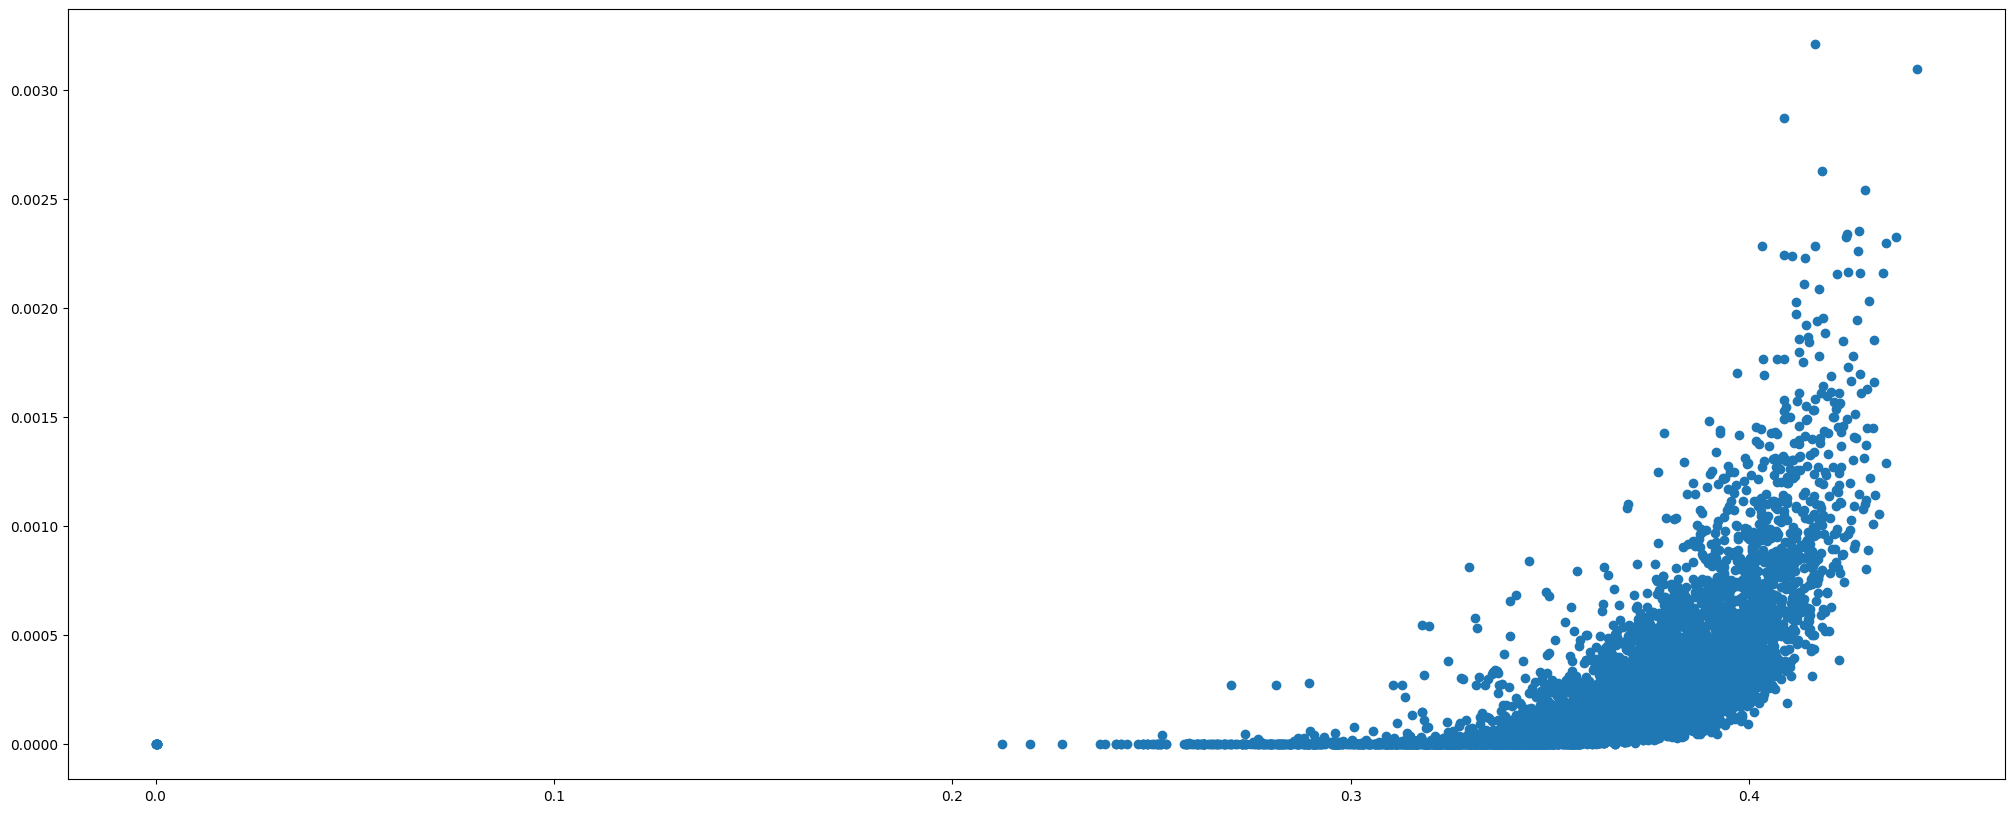

In [509]:
plt.figure(figsize=(25, 10)) 

plt.scatter(combCentralityMeasuresPre2015['ClosenessCentrality'], combCentralityMeasuresPre2015['BetwenessCentrality'])

plt.scatter(combCentralityMeasures['ClosenessCentrality'], combCentralityMeasures['BetwenessCentrality'])


In [510]:
betwenessDfPre2015

,Unnamed: 0,ID,BetwenessCentrality
0,0,00459419,0.000734
1,1,001a63e0,0.000072
2,2,008a6e6d,0.000204
3,3,00844823,0.000659
4,4,00b0bb87,0.000289
...,...,...,...
7381,7381,ffd4896e,0.000503
7382,7382,ffd69308,0.000183
7383,7383,ffec9769,0.000009
7384,7384,ffed43e3,0.000003


In [518]:
randEdges = pd.read_csv('random_4.csv')
newG = nx.from_pandas_edgelist(randEdges)

In [531]:
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del newG
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

4.04987572561741
5.711845062665505


: 

In [519]:
jackRand = list(nx.jaccard_coefficient(newG))
jackRand.sort(key=lambda x: x[2], reverse=True)
jackRand

[('7f9d956a', 'f6857b4f', 0.07272727272727272),
 ('da76bab4', 'ca6f10e6', 0.06557377049180328),
 ('968a1c2f', 'ca6f10e6', 0.06349206349206349),
 ('32b84cec', 'e7f341a7', 0.06060606060606061),
 ('f08e1c7a', '88f53b75', 0.06060606060606061),
 ('23f32ea1', 'c2e5f306', 0.05952380952380952),
 ('63614ee5', 'cb64672e', 0.05952380952380952),
 ('08a298be', '52459cdc', 0.058823529411764705),
 ('c997b942', 'b907d169', 0.057971014492753624),
 ('ca8ea008', '7f94982c', 0.057692307692307696),
 ('fc0f3ef3', 'b9236adc', 0.05747126436781609),
 ('6c2f5996', '02760e49', 0.056910569105691054),
 ('94b442c0', 'e2dcc60e', 0.05660377358490566),
 ('9853983f', '6b6c793c', 0.055248618784530384),
 ('34b0387f', '96a4976d', 0.05511811023622047),
 ('c1949191', 'b2c66859', 0.05504587155963303),
 ('d2017dbe', '7841c6b1', 0.0547945205479452),
 ('5a7301ae', '82ec2963', 0.0547945205479452),
 ('fb15bf58', '81c7d697', 0.0547945205479452),
 ('82c215a0', '8e812b0c', 0.05434782608695652),
 ('45ac80b3', '226ddf9d', 0.0543478260

In [522]:
jackRandDf = pd.DataFrame(jackRand, columns=['ID1','ID2', 'JacardValue'])

In [527]:
# jackRandDf.to_csv('JackRand.csv')
jackRandDf = pd.read_csv('jackRand.csv')

In [525]:
jackRandDf['Name1'] = jackRandDf['ID1'].map(nameDict)
jackRandDf["Name2"] = jackRandDf['ID2'].map(nameDict)

In [528]:
jackRandDf

,Unnamed: 0,ID1,ID2,JacardValue
0,0,7f9d956a,f6857b4f,0.072727
1,1,da76bab4,ca6f10e6,0.065574
2,2,968a1c2f,ca6f10e6,0.063492
3,3,32b84cec,e7f341a7,0.060606
4,4,f08e1c7a,88f53b75,0.060606
...,...,...,...,...
46479729,46479729,a92a4407,f54d2149,0.000000
46479730,46479730,a2da58b1,f54d2149,0.000000
46479731,46479731,a2da58b1,6956ff08,0.000000
46479732,46479732,62562194,b18a3023,0.000000


In [511]:
jacksGraphPre2015 = list(nx.jaccard_coefficient(G2015Filtered))
jacksGraphPre2015.sort(key=lambda x: x[2], reverse=True)
jacksGraphPre2015

KeyboardInterrupt: 

In [114]:
# jackDfPre2015 = pd.DataFrame(jacksGraphPre2015, columns=['ID1','ID2', 'JacardValue'])

# jackDfPre2015.to_csv('jackValues.csv')


In [512]:

jackDfPre2015 = pd.read_csv('jackValuesPre2015.csv')
jackDfPre2015.drop(columns={'Unnamed: 0'}, inplace=True)



In [513]:
jackDfPre2015

,ID1,ID2,JacardValue
0,9866afec,09507ffa,0.666667
1,cfa30154,91f2da4c,0.648649
2,cfa30154,261d5529,0.648649
3,a712ca2b,47347124,0.638889
4,47347124,2a657da0,0.638889
...,...,...,...
26991071,4be9a341,fe888e39,0.000000
26991072,4be9a341,dc8f5b58,0.000000
26991073,dc8f5b58,1b96f8ae,0.000000
26991074,dc8f5b58,fe888e39,0.000000


In [497]:
jackDfPre2015['Name1'] = jackDfPre2015['ID1'].map(nameDict)
jackDfPre2015["Name2"] = jackDfPre2015['ID2'].map(nameDict)



In [498]:
jackDfPre2015

,ID1,ID2,JacardValue,Name1,Name2
0,9866afec,09507ffa,0.666667,Marko-Jankovic,Aleksandar-Radovanovic
1,cfa30154,91f2da4c,0.648649,Dylan-Gissi,Casimir-Ninga
2,cfa30154,261d5529,0.648649,Dylan-Gissi,Mamadou-NDiaye
3,a712ca2b,47347124,0.638889,Issa-Diop,Sami-Larabi
4,47347124,2a657da0,0.638889,Sami-Larabi,Mathieu-Cafaro
...,...,...,...,...,...
26991071,4be9a341,fe888e39,0.000000,Miquel-Robuste,Laszlo-Benes
26991072,4be9a341,dc8f5b58,0.000000,Miquel-Robuste,Florian-Klein
26991073,dc8f5b58,1b96f8ae,0.000000,Florian-Klein,Leonardo-Melazzi
26991074,dc8f5b58,fe888e39,0.000000,Florian-Klein,Laszlo-Benes


In [499]:
# G2015.edges['9866afec', '09507ffa']
pre2015Edges[pre2015Edges['source'] == '09507ffa']

NameError: name 'pre2015Edges' is not defined

In [529]:
jackDfPre2015[jackDfPre2015['JacardValue'] > 0.25]

,ID1,ID2,JacardValue
0,9866afec,09507ffa,0.666667
1,cfa30154,91f2da4c,0.648649
2,cfa30154,261d5529,0.648649
3,a712ca2b,47347124,0.638889
4,47347124,2a657da0,0.638889
...,...,...,...
1744,03bd0bf4,88f73cf2,0.252174
1745,9f4647e9,42f4f848,0.251969
1746,6fb59070,4a895384,0.251908
1747,51d90d26,4d0d4790,0.251799


In [515]:
jackDf

,Unnamed: 0,ID1,ID2,JacardValue
0,0,261d5529,cfa30154,0.648649
1,1,cfa30154,91f2da4c,0.648649
2,2,bdedffac,50cfe1f7,0.645161
3,3,2a657da0,47347124,0.638889
4,4,4e7db402,47347124,0.638889
...,...,...,...,...
22676462,22676462,e921b9db,6f51e382,0.000000
22676463,22676463,defb905a,683e9dbc,0.000000
22676464,22676464,f6c4946d,c9bdc773,0.000000
22676465,22676465,f6c4946d,6f51e382,0.000000


In [530]:
jackDf[jackDf['JacardValue'] == 0]


,Unnamed: 0,ID1,ID2,JacardValue
7667312,7667312,791abba1,ea26e99f,0.0
7667313,7667313,791abba1,2f98644a,0.0
7667314,7667314,791abba1,2f1736e5,0.0
7667315,7667315,791abba1,39ad0b72,0.0
7667316,7667316,791abba1,0d0828e8,0.0
...,...,...,...,...
22676462,22676462,e921b9db,6f51e382,0.0
22676463,22676463,defb905a,683e9dbc,0.0
22676464,22676464,f6c4946d,c9bdc773,0.0
22676465,22676465,f6c4946d,6f51e382,0.0


In [517]:
# test = jackDf[jackDf['JacardValue'] > 0.25]
# test


#Run on intervals, first 100 jacards then next 100 to see how strongly our jacard magnitude predicts future edges


#on > 0.1 -> Got 1542 rows in a frame!


import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    jdf = jackDf[jackDf['JacardValue'] > 0.1]
    jacardPredictedResults = post2015Edges[post2015Edges['source'] == '']
    for (index, row) in jdf.iterrows():
        test = post2015Edges[((post2015Edges['source'] == jdf.at[index, 'ID1']) & (post2015Edges['target'] == jdf.at[index, 'ID2'])) | ((post2015Edges['target'] == jdf.at[index, 'ID1']) & (post2015Edges['source'] == jdf.at[index, 'ID2']))]
        jacardPredictedResults = jacardPredictedResults.append(test)
        # print(len(test.index))
jacardPredictedResults

,source,target,Season,Name1,Name2,Squad,League,LeagueRank,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2
95325,8f63e400,626fab5f,"[2016-2017, 2019-2020]",Tim-Rieder,Raphael-Framberger,"[Augsburg, Augsburg]","[1. Bundesliga, 1. Bundesliga]","[13th, 15th]",Germany,Germany,1993,1995,5,21,0.0,0.0
234778,e3a5814e,6ca5ec4b,"[2016-2017, 2016-2017, 2017-2018, 2018-2019]",Ainsley-Maitland-Niles,Alex-Iwobi,"[Arsenal, Arsenal, Arsenal, Arsenal]","[1. Premier League, Jr. PL2 — Div. 1, 1. Premi...","[5th, 4th, 6th, 5th]",England,Nigeria,1997,1996,45,88,1.0,9.0
134638,aad53e64,1a6f612d,"[2016-2017, 2017-2018]",Kike-Barja,Tano-Bonnin,"[Osasuna, Osasuna]","[1. La Liga, 2. Segunda División]","[19th, 8th]",Spain,Dominican Republic,1997,1990,20,14,1.0,0.0
120187,a10361d2,2945f4b7,[2016-2017],Aleix-Garcia,Thierry-Ambrose,[Manchester City],[Jr. PL2 — Div. 1],[2nd],Spain,Guadeloupe,1997,1997,4,8,0.0,5.0
56186,6ed1a2a2,2945f4b7,[2017-2018],Manu-Garcia,Thierry-Ambrose,[NAC Breda],[1. Eredivisie],[14th],Spain,Guadeloupe,1998,1997,34,30,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468,2258c078,098139eb,[2018-2019],Federico-Viviani,Danilo-Soddimo,[Frosinone],[1. Serie A],[19th],Italy,Italy,1992,1987,5,10,0.0,0.0
173445,c311243f,1cd87320,[2019-2020],Dennis-Aogo,Matthias-Ostrzolek,[Hannover 96],[2. 2. Bundesliga],[6th],Germany,Germany,1987,1990,4,7,0.0,0.0
244388,e7d22eae,9460aaed,[2016-2017],Jan-Moravek,Moritz-Leitner,[Augsburg],[1. Bundesliga],[13th],Czech Republic,Germany,1989,1992,13,6,0.0,0.0
137646,ac7e640b,a5cd894b,[2016-2017],Mattia-Caldara,Boukary-Drame,[Atalanta],[1. Serie A],[4th],Italy,Senegal,1994,1985,30,10,7.0,0.0


In [245]:
jacardPredictedResults

,source,target,Season,Name1,Name2,Squad,League,LeagueRank,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2
95325,8f63e400,626fab5f,"[2016-2017, 2019-2020]",Tim-Rieder,Raphael-Framberger,"[Augsburg, Augsburg]","[1. Bundesliga, 1. Bundesliga]","[13, 15]",Germany,Germany,1993,1995,5,21,0.0,0.0
234778,e3a5814e,6ca5ec4b,"[2016-2017, 2016-2017, 2017-2018, 2018-2019]",Ainsley-Maitland-Niles,Alex-Iwobi,"[Arsenal, Arsenal, Arsenal, Arsenal]","[1. Premier League, Jr. PL2 — Div. 1, 1. Premi...","[5, 4, 6, 5]",England,Nigeria,1997,1996,45,88,1.0,9.0
134638,aad53e64,1a6f612d,"[2016-2017, 2017-2018]",Kike-Barja,Tano-Bonnin,"[Osasuna, Osasuna]","[1. La Liga, 2. Segunda División]","[19, 8]",Spain,Dominican Republic,1997,1990,20,14,1.0,0.0
120187,a10361d2,2945f4b7,[2016-2017],Aleix-Garcia,Thierry-Ambrose,[Manchester City],[Jr. PL2 — Div. 1],[2],Spain,Guadeloupe,1997,1997,4,8,0.0,5.0
56186,6ed1a2a2,2945f4b7,[2017-2018],Manu-Garcia,Thierry-Ambrose,[NAC Breda],[1. Eredivisie],[14],Spain,Guadeloupe,1998,1997,34,30,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161950,bc61cc65,15107141,[2017-2018],Inigo-Perez,Guillermo,[Numancia],[2. Segunda División],[6],Spain,Spain,1988,1993,38,37,2.0,8.0
50692,68c720b5,450ab6fc,[2016-2017],Adam-Armstrong,Jamaal-Lascelles,[Newcastle Utd],[2. Championship],[1],England,England,1997,1993,2,43,0.0,3.0
27927,4d447171,0984c5d5,[2016-2017],Julien-Vercauteren,Remi-Walter,[Nice],[1. Ligue 1],[3],Belgium,France,1993,1995,0,22,0.0,0.0
216551,dacc061c,9d33e42f,[2020-2021],Andrew-Wooten,Erwin-Hoffer,[Admira],[1. Bundesliga],[11],United States,Austria,1989,1987,19,20,3.0,2.0


In [7]:
def ensemble(G):
    clustering_DP = []
    short_path_DP = []
    graphList = []
    for i in range(100): # 1000 is better
        print(i)
        DP = G.copy() # the function edits the graph in place
        nx.double_edge_swap(DP,nswap=10*G.number_of_edges(), max_tries=10000000)
        curGraph = nx.to_pandas_edgelist(DP)
        curGraph.to_csv(f'random_{i}.csv', index=False)
        graphList.append(DP)
    return graphList
        # c_DP = np.mean(list(nx.clustering(DP).values()))
        # if nx.is_connected(DP)==True:
        #     d_DP = nx.average_shortest_path_length(DP,weight=None)
        # clustering_DP.append(c_DP)
        # short_path_DP.append(d_DP)

    # print(np.mean(clustering_DP))
    # print(np.std(clustering_DP))

    # print(np.mean(short_path_DP))
    # print(np.std(short_path_DP))

In [8]:
def ensembleStats(graphList):
    clustering_DP = []
    short_path_DP = []
    for i in range(100): # 1000 is better
        print(i)
        G = graphList[i]
      
        c_DP = np.mean(list(nx.clustering(G).values()))
        # if nx.is_connected(G)==True:
        #     d_DP = nx.average_shortest_path_length(G,weight=None)
        #     short_path_DP.append(d_DP)
        clustering_DP.append(c_DP)

    return clustering_DP
        

    # print(np.mean(clustering_DP))
    # print(np.std(clustering_DP))

    # print(np.mean(short_path_DP))
    # print(np.std(short_path_DP))

In [460]:
def ensembleStats2():
    #clustering_DP = []
    short_path_DP = []
    myfile = open('xyz.txt', 'w')



    for i in range(100): # 1000 is better
        print(i)
        randEdges = pd.read_csv(f'random_{i}.csv')
        newG = nx.from_pandas_edgelist(randEdges)
      
        #c_DP = np.mean(list(nx.clustering(G).values()))
        if nx.is_connected(newG)==True:
            d_DP = nx.average_shortest_path_length(newG,weight=None)
            short_path_DP.append(d_DP)
            #myfile.write("\n", d_DP)
        #clustering_DP.append(c_DP)

    myfile.close()
    
    return short_path_DP

        

    # print(np.mean(clustering_DP))
    # print(np.std(clustering_DP))

    # print(np.mean(short_path_DP))
    # print(np.std(short_path_DP))

In [48]:
ERNetwork = nx.erdos_renyi_graph(5000, 0.01, directed=False)

In [54]:
BBA = nx.barabasi_albert_graph(5000, 80)

157.44


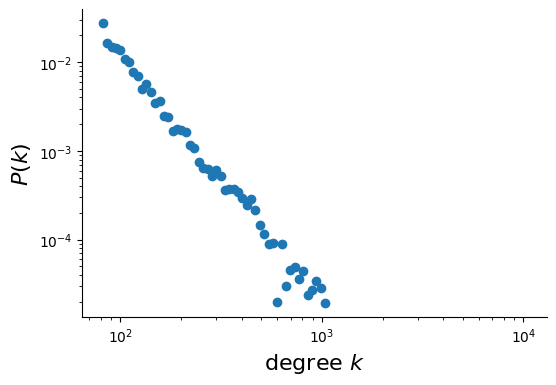

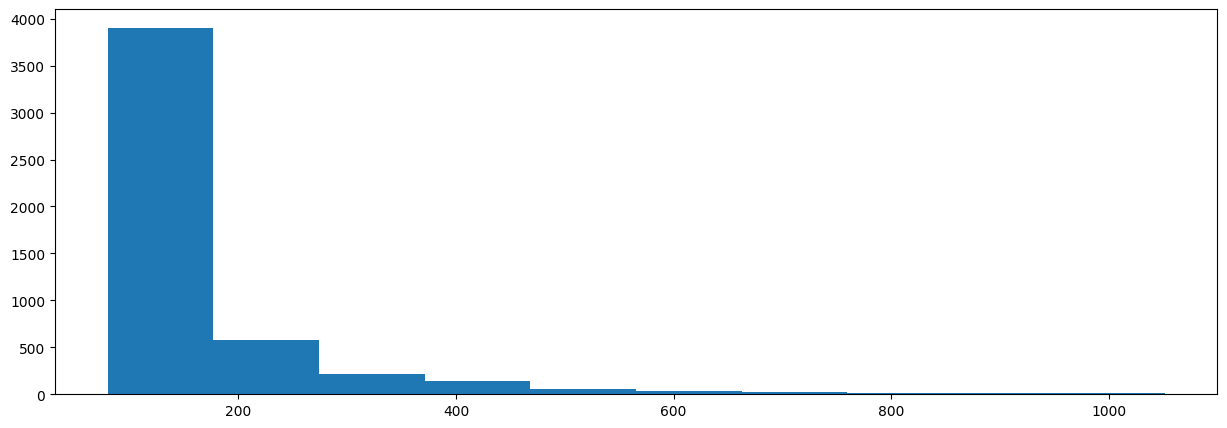

In [55]:
deg = [BBA.degree(n) for n in BBA.nodes()]
plot_degree_dist(BBA, deg)
plot_degree_dist2(BBA, deg)

50.0752


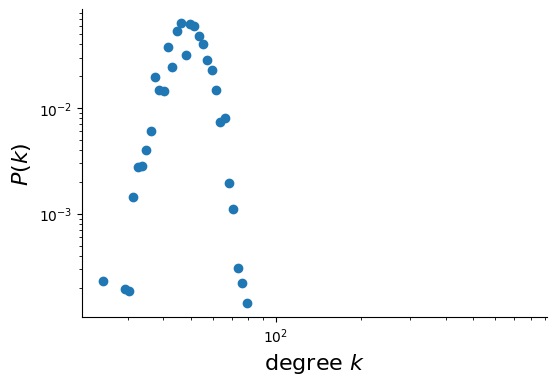

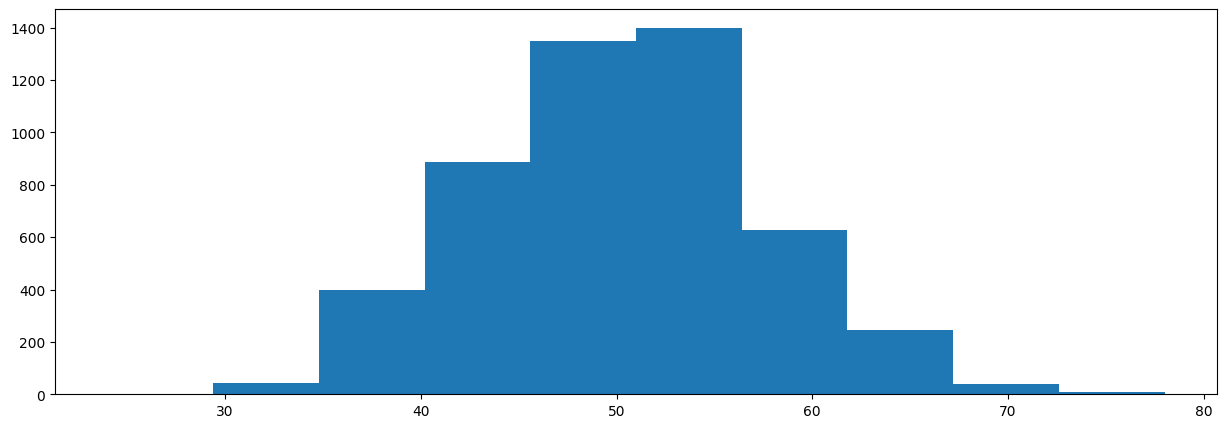

In [49]:
deg = [ERNetwork.degree(n) for n in ERNetwork.nodes()]
plot_degree_dist(ERNetwork, deg)
plot_degree_dist2(ERNetwork, deg)

In [ ]:
def ensembleStatsCloseness():
    #clustering_DP = []
    short_path_DP = []
    for i in range(100): # 1000 is better
        print(i)
        randEdges = pd.read_csv(f'random_{i}.csv')
        newG = nx.from_pandas_edgelist(randEdges)
      
        #c_DP = np.mean(list(nx.clustering(G).values()))
        if nx.is_connected(G)==True:
            d_DP = nx.average_shortest_path_length(G,weight=None)
            short_path_DP.append(d_DP)
        #clustering_DP.append(c_DP)

    return short_path_DP

In [253]:
clustering_List = ensembleStats(GList)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [480]:
print(np.mean(clustering_List))
print(np.std(clustering_List))

NameError: name 'clustering_List' is not defined

In [461]:
shortestPath_List = ensembleStats2()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [462]:
shortestPath_List

[2.277947646850616,
 2.2777953726763203,
 2.278024602387535,
 2.277925282976351,
 2.278349452542137,
 2.277916503242443,
 2.278171094267344,
 2.277832064736188,
 2.278158849408431,
 2.2780230505217354,
 2.2782481773548766,
 2.278189036387001,
 2.2775813640050044,
 2.2783738784846563,
 2.278119415010369,
 2.277552707633798,
 2.2778986248980924,
 2.277954109415042,
 2.278225537120949,
 2.2777731150942335,
 2.278283083706153,
 2.277925835695677,
 2.278348347103485,
 2.2780433735861814,
 2.2779642071719586,
 2.278200643492846,
 2.277968565151259,
 2.27776121037029,
 2.2778247943512087,
 2.277934891789248,
 2.2781450739421536,
 2.278176196291891,
 2.278147816280348,
 2.2776168868509137,
 2.2783323820183394,
 2.2776721375250717,
 2.2780947764834933,
 2.278148794168386,
 2.277653621427653,
 2.277976154412773,
 2.277734573550467,
 2.278498750535447,
 2.2780886753124725,
 2.2779028978436506,
 2.2777686083058835,
 2.277917055961769,
 2.2779549172355957,
 2.2782021953586455,
 2.278009275055458,
 

In [481]:
print(np.mean(shortestPath_List))
print(np.std(shortestPath_List))

2.278008958092183
0.00022139979665686016


In [485]:
print(np.mean(newList))
print(np.std(newList))

0.01870656435280906
3.468732317156804e-05


In [248]:
GList = ensemble(G)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [137]:
j = 0
MyDf = pd.DataFrame()
for i in GList:
    curGraph = nx.to_pandas_edgelist(i)
    curGraph.to_csv(f'random_{j}.csv', headers=True, index=False)
    curGraph['GraphNum'] = j
    j+= 1
    MyDf = MyDf.append(curGraph)

C:\Users\User\AppData\Local\Temp\ipykernel_24408\2206332925.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MyDf = MyDf.append(curGraph)
C:\Users\User\AppData\Local\Temp\ipykernel_24408\2206332925.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MyDf = MyDf.append(curGraph)


In [14]:
i = 0
randGList = []
for i in range(100):
    print(i)
    randEdges = pd.read_csv(f'random_{i}.csv')
    newG = nx.from_pandas_edgelist(randEdges)
    # randGList.append(newG)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


KeyboardInterrupt: 

In [4]:
sp = nx.average_shortest_path_length(G,weight=None)
print(sp)

2.5398309741784413


In [5]:
randEdges = pd.read_csv('random_9.csv')
newG = nx.from_pandas_edgelist(randEdges)

In [6]:
sp = nx.average_shortest_path_length(newG,weight=None)
print(sp)

2.2780230505217354


In [56]:
import psutil 
import gc
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

# del newG
# gc.collect()
# print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

52.03930365817561


In [16]:
psutil.virtual_memory().total

16978997248

In [ ]:
degrees = [G.degree(n) for n in G.nodes()]
# degrees2 = [randGList[9].degree(n) for n in randGList[9].nodes()]
# degrees3 = [randGList[54].degree(n) for n in randGList[54].nodes()]

degreesWeighted = []
for n in G.nodes():
    weightDeg = 0
    for m in G.neighbors(n):
        weightDeg +=G[n][m]['Weight']
    degreesWeighted.append(weightDeg)

plot_degree_dist(G,degrees)

plot_degree_dist(G,degreesWeighted)


In [47]:
rangGList[54].number_of_nodes()

NameError: name 'rangGList' is not defined

In [46]:
print(nx.average_shortest_path_length(randGList[4],weight=None))

KeyboardInterrupt: 

In [140]:
MyDf[560415:]

,source,target,Season,Name1,Name2,Weight,GraphNum
560415,ff87875a,ffbbc83b,NaN,NaN,NaN,NaN,0
0,00242b75,ef345601,NaN,NaN,NaN,NaN,1
1,00242b75,6d487875,NaN,NaN,NaN,NaN,1
2,00242b75,5c5f1c9d,NaN,NaN,NaN,NaN,1
3,00242b75,294450ba,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
560411,ff45add5,ffd4896e,NaN,NaN,NaN,NaN,1
560412,ff674795,ffcbeb74,NaN,NaN,NaN,NaN,1
560413,ffec9769,fff10a46,NaN,NaN,NaN,NaN,1
560414,ffec9769,ffed43e3,NaN,NaN,NaN,NaN,1


In [120]:
val = nx.average_shortest_path_length(GList[0],weight=None)

In [121]:
val

2.2781000273170897

In [229]:
import statistics
avg = statistics.mean([e[2]['Weight'] for e in G.edges(data=True)])
more_than10 = [e[2]['Weight'] for e in G.edges(data=True)]
more_than10.sort(reverse=True)
max_weight = max([e[2]['Weight'] for e in G.edges(data=True)])
print(avg, max_weight)
more_than10[200:]

1.6094668960200993 19


[10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,


In [393]:
import random
import math

#More than 5 in weight -> Boost
#Same country -> Boost
#unique squads -> Boost


def information_cascade(G,t_tot,init): 
    # G = graph; t_tot = number of timesteps to run the model for; init = list of nodes that are activated at t=0
    
    t = 0
    
    #avg_weight = statistics.mean([e[2]['Weight'] for e in G.edges(data=True)])
    #max_weight = max([e[2]['Weight'] for e in G.edges(data=True)])
    multiplier = 0.1
    
    activation_times = {}
    for i in init:
        activation_times[i]=0
    
    while t<t_tot:
    
        curr_infectious = [n for n in activation_times if activation_times[n]==t]

        for n in curr_infectious:
            for m in G.neighbors(n):
                if m not in activation_times.keys():
                    multiplier = 0.1
                    if(G[n][m]['UniqueTeams'] > 1 ):
                        multiplier+= (0.05 * G[n][m]['UniqueTeams'])

                    if(G[n][m]['Nation1'] == G[n][m]['Nation2']):
                        multiplier+= 0.2
                        
                    p = G[n][m]['Weight']
                    if(p > 8):
                        multiplier+= 0.65
                    elif(p > 5):
                        multiplier+= 0.4
                    elif(p > 3):
                        multiplier+= 0.1
                    
                    # if p>random.uniform(0,1)*10:
                    #     activation_times[m] = t+1
                    if(multiplier >= 1):
                        print(n, m)
                        multiplier = 0.99
                    check = math.floor( random.uniform(0, 1/(1-multiplier)))
                    # print(check, p)

                    if(check == 1):
                        activation_times[m] = t+1
                    
                        
                        
        t+=1

    return activation_times

In [419]:
print(G.nodes['1b013e33']['DOB'])

1975


In [452]:
def age_influence(G,t_tot,init): 
    # G = graph; t_tot = number of timesteps to run the model for; init = list of nodes that are activated at t=0
    
    t = 0
    
    #avg_weight = statistics.mean([e[2]['Weight'] for e in G.edges(data=True)])
    #max_weight = max([e[2]['Weight'] for e in G.edges(data=True)])
    multiplier = 0.1
    
    activation_times = {}
    for i in init:
        activation_times[i]=0
    
    while t<t_tot:
    
        curr_infectious = [n for n in activation_times if activation_times[n]==t]

        for n in curr_infectious:
            for m in G.neighbors(n):
                if m not in activation_times.keys():
                    multiplier = 0.1
                    if(int(G.nodes[m]['DOB']) - int(G.nodes[n]['DOB']) > 9):
                        print('I touch young players', G.nodes[n]['Name'],G.nodes[m]['Name'])
                        multiplier+= 0.4
                    
                    p = G[n][m]['Weight']
                    if(p > 8):
                        multiplier+= 0.65
                    elif(p > 5):
                        multiplier+= 0.4
                    elif(p > 3):
                        multiplier+= 0.1
                    
                    # if p>random.uniform(0,1)*10:
                    #     activation_times[m] = t+1
                    if(multiplier >= 1):
                        print('He is my master')
                        multiplier = 0.99
                    check = math.floor( random.uniform(0, 1/(1-multiplier)))
                    # print(check, p)

                    if(check == 1):
                        activation_times[m] = t+1
                    
                        
                        
        t+=1

    return activation_times

In [312]:
import statistics
nums = [0] * 100
numSum = 0
for i in range(100):
    nums[i] = random.uniform(0,1)*10
    if(nums[i] < 1):
        numSum +=1
        #9-20


print(numSum, statistics.mean(nums))
print(nums)

8 4.933796128182585
[3.993796793528462, 4.2458879281195205, 9.320776248846048, 9.81981896566021, 2.2647933152007593, 0.3498636765088381, 2.69486203797297, 7.448189187112434, 4.740416457726032, 4.890700152223847, 6.764912438697245, 2.208643304591127, 0.02925786802028374, 4.276602623547533, 8.321996298048793, 1.8441646330752515, 5.89005113411211, 9.05034078612145, 8.379362253645526, 3.7536672625831082, 7.279899996750174, 6.634441093925243, 4.070161741531461, 0.9261238501846003, 4.542139799542767, 0.2440142081402119, 6.223617584246302, 0.6114204626425934, 3.2210512993588027, 3.1443724225953895, 7.136689307598995, 7.66563069615251, 3.003647514871953, 7.807830466455709, 6.413554212084625, 0.5228592219641093, 4.526465257090853, 8.585565430908014, 8.713217393402866, 1.5703994481201577, 3.8707865772378938, 7.811719945457707, 3.4918926373853996, 8.842667195875883, 4.292725048015344, 6.607678504355991, 3.857307548306268, 4.092072837100769, 1.7117148473346788, 8.9745796671784, 2.60246292339702, 6

In [387]:
import random
import math
chance = 0.5
val = 0
for i in range(100):
    print( random.uniform(0, 1/(1-chance)))
    if(math.floor( random.uniform(0, 1/(1-chance))) == 1):
        val +=1

print(val)


1.0242852071259
0.19596554326920423
1.8990678233048908
0.9080104075749527
1.9846054864758376
1.0705568372825738
0.37007648830536843
0.5504834649487624
1.679013531162335
1.8439315782920795
1.133953724633704
1.996203717349483
1.3525791040298374
0.8261404669545331
1.8093297584785222
1.846940661121511
0.8270037340536474
0.14815818237783995
0.423519086710882
0.49419071634113565
1.0624203059552326
0.43497021044527084
1.049821370029182
0.1427542897021299
0.8118873142077669
0.7614674992961024
0.3968762078145043
1.7702635797966397
1.5344438334246837
1.1764820654746642
1.4707248855535224
0.47646810203613654
0.2894145600083393
0.37668840808810344
1.6389680034789451
0.776166407636657
0.2432288777654148
0.12859617074304408
1.179545074096403
0.531469756013937
1.8943418731075752
0.5336032654312999
1.0711987002545955
1.5133258045668339
1.8934544181734538
0.24369346612749876
1.2168908451371705
0.015613038193310835
1.5600921703497481
0.9910124238623674
0.6437325210989941
1.9623340762421153
0.71760728669

In [367]:
degreeList = [(G.degree(i), i) for i in G.nodes()]
degreeList.sort(reverse=True)
# print(degreeList2)
# 
# print(degreeList)
degreeList = [n[1]for n in degreeList]

print(G.degree('1b013e33'))
print(G.degree('561de8d0'))
print(G.degree('000b3da6'))

print(G.degree('d781d855'))

print(G.degree('4cde5509'))

print(G.degree('7c0bda9b'))

print(G.degree('f4ec4fd0'))

print(G.degree('5bc43860'))


57
77
216
73
260
76
423
44


In [412]:
print(G.get_edge_data('4cde5509','6f08cece'))

{'Season': "['2001-2002', '2002-2003', '2003-2004', '2004-2005', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2012-2013', '2013-2014', '2014-2015', '2015-2016']", 'Weight': 12, 'Name1': 'Maxwell', 'Name2': 'Zlatan-Ibrahimovic', 'Nation1': 'Brazil', 'Nation2': 'Sweden', 'UniqueTeams': 4, 'Born1': 1981, 'Born2': '1981'}


{'Season': "['2001-2002', '2002-2003', '2003-2004', '2004-2005', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2012-2013', '2013-2014', '2014-2015', '2015-2016']",
 'Weight': 12,
 'Name1': 'Maxwell',
 'Name2': 'Zlatan-Ibrahimovic',
 'Nation1': 'Brazil',
 'Nation2': 'Sweden',
 'UniqueTeams': 4,
 'Born1': 1981,
 'Born2': '1981'}

In [402]:


# result = information_cascade(G,1, ['000b3da6', '561de8d0','1b013e33'])
result1 = information_cascade(G,1, ['000b3da6']) #high number of 1's and 2's
result2 = information_cascade(G,3, ['561de8d0']) #Giggs
result3 = information_cascade(G,1, ['1b013e33']) # G Nev
result4 = information_cascade(G,3, ['4cde5509']) # Zlatan
result5 = information_cascade(G,1, ['7c0bda9b']) # Puyol
result6 = information_cascade(G,3, ['f4ec4fd0']) # Kevin Prince
result7 = information_cascade(G,1, ['5bc43860']) # Brendan Aaronsson

top10Degs = degreeList[0:10]



# print(len(result1), len(result4))
print(len(result1), len(result2), len(result3), len(result4), len(result5), len(result6), len(result7))
#top10Degs

808d48f3 963829d0
e0d9bbbe 08b10f50
070ec0b1 89565ac5
8c8b5071 6ef56efd
29 3573 13 5823 21 7258 8


In [409]:
top10Degs = degreeList[0:10]
bot10Degs = degreeList[9690:]
print(len(bot10Degs))

result = information_cascade(G,1, top10Degs) # top 10 degs
result2 = information_cascade(G,1, bot10Degs) # bot 10 degs




# print(len(result1), len(result4))
print(len(result), len(result2))

10
534 45


In [451]:
result1 = age_influence(G,1, ['000b3da6']) #high number of 1's and 2's
result2 = age_influence(G,1, ['561de8d0']) #Giggs
result3 = age_influence(G,1, ['1b013e33']) # G Nev
result4 = age_influence(G,1, ['4cde5509']) # Zlatan
result5 = age_influence(G,1, ['7c0bda9b']) # Puyol
result6 = age_influence(G,1, ['f4ec4fd0']) # Kevin Prince
result7 = age_influence(G,1, ['5bc43860']) # Brendan Aaronsson
result8 = age_influence(G,1, ['d70ce98e']) # GOAT

print(len(result1), len(result2), len(result3), len(result4), len(result5), len(result6), len(result7), len(result8))


I touch young players Manuel-Iturra Keidi-Bare
I touch young players Manuel-Iturra Youssef-En-Nesyri
I touch young players Manuel-Iturra Sergio-Akieme
I touch young players Manuel-Iturra Esteban-Rolon
I touch young players Manuel-Iturra Pablo-Claveria
I touch young players Manuel-Iturra Stipe-Perica
I touch young players Manuel-Iturra Igor-Lichnovsky
I touch young players Manuel-Iturra Ivan-Alejo
I touch young players Manuel-Iturra Sulayman-Marreh
I touch young players Manuel-Iturra Diego-Gonzalez
I touch young players Manuel-Iturra Adalberto-Penaranda
I touch young players Manuel-Iturra Bruno-Fernandes
I touch young players Manuel-Iturra Pau-Torres
I touch young players Manuel-Iturra Joni-Montiel
I touch young players Manuel-Iturra Federico-Ricca
I touch young players Manuel-Iturra Emanuel-Cecchini
I touch young players Manuel-Iturra Lucas-Evangelista
I touch young players Manuel-Iturra Hector
I touch young players Manuel-Iturra Alfonso-Pedraza
I touch young players Manuel-Iturra Pabl

In [330]:
n = '1b013e33'
weights = []
print(n)
for m in G.neighbors(n):
    p = G[n][m]['Weight']
    weights.append(p)
print(weights)
len(weights)

1b013e33
[2, 3, 7, 1, 1, 3, 16, 1, 1, 11, 5, 5, 8, 5, 8, 9, 3, 17, 12, 2, 4, 9, 1, 1, 5, 1, 2, 3, 1, 1, 5, 3, 2, 4, 4, 2, 1, 1, 2, 1, 3, 2, 2, 3, 1, 4, 2, 5, 3, 6, 3, 1, 3, 3, 3, 1, 3]


57

In [301]:
print(weights)

[2, 4, 2, 5, 3, 1, 1, 4, 3, 1, 3, 3, 1, 1, 2, 3, 5, 3, 1, 1, 5, 4, 5, 2, 1, 2, 4, 3, 1, 3, 1, 4, 1, 1, 2, 1, 2, 1, 5, 4, 1, 3, 1, 1, 5, 5, 1, 4, 3, 2, 2, 2, 1, 1, 1, 2, 1, 2, 4, 1, 2, 5, 1, 2, 1, 2, 2, 4, 1, 1, 1, 1, 3]


In [50]:
j = 0
test = jackDf[jackDf['JacardValue'] > 0.5]
for (index, row) in test.iterrows():
    print(index)
    for(i, row2) in post2015Edges.iterrows():
        if(test.at[index, 'ID1'] == post2015Edges.at[i, 'source'] or test.at[index, 'ID1'] == post2015Edges.at[i, 'target']):
            if(test.at[index, 'ID2'] == post2015Edges.at[i, 'source'] or test.at[index, 'ID2'] == post2015Edges.at[i, 'target']):
                j+=1

print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
5


In [46]:
communityDf = pd.DataFrame(partition.items(), columns=['ID', 'Community'])
communityDf.groupby('Community').count()

,ID
Community,
0,1757
1,2160
2,1666
3,2059
4,2058


In [50]:
from networkx import betweenness_centrality
graphDict = betweenness_centrality(G)
#9.5 mins

In [51]:
graphDict = dict(sorted(graphDict.items(), key=lambda item: item[1], reverse = True))
graphDict

{'5b1bf5e3': 0.002945408048750564,
 'f4ec4fd0': 0.0028466327206557638,
 '34e4343c': 0.002158418971569649,
 '2054d037': 0.0021300516909143526,
 '5c2da10f': 0.00210824819434315,
 'e94d79e3': 0.0019913555969905336,
 'ff182fdc': 0.001875698238421139,
 '531807b3': 0.0017775645972176602,
 '6265208f': 0.0017064293451512697,
 '45e17712': 0.001562412818590195,
 'd3d758d8': 0.0015546145121386956,
 '74dc806c': 0.0015273946219981655,
 '9260926b': 0.001515160230865228,
 '4914ed4a': 0.0015121773981769816,
 '0fe7f7bc': 0.0015097621914799072,
 '601ef102': 0.0014232982606509942,
 '1163de29': 0.0014087996007687376,
 'ed239245': 0.0013826452059331183,
 '2bae5658': 0.0013488842754896385,
 '8e58987d': 0.0013364894443951038,
 '8309b068': 0.0012954146575028407,
 'e4086af3': 0.00128626497813029,
 '8ff07990': 0.0012762557346750985,
 'fe05804b': 0.0012749683534737583,
 '0ef89a37': 0.0012740751655014172,
 '8dbff17c': 0.0012685749640687829,
 '1001ae82': 0.0012675799486453003,
 'ae82fa48': 0.0012645393497923122,
 

In [60]:
betwenessDf = pd.DataFrame(list(graphDict.items()), columns=['ID', 'BetwenessCentrality'])
betwenessDf
betwenessDf[betwenessDf['ID'] == 'fffea3e5']

,ID,BetwenessCentrality
4948,fffea3e5,0.000087


In [33]:
closenessDf = pd.read_csv('closenessValues.csv')
closenessDf

,Unnamed: 0,ID,ClosenessCentrality
0,0,00242b75,0.368475
1,1,00242715,0.413233
2,2,00459419,0.446485
3,3,001a63e0,0.386599
4,4,005c0807,0.371481
...,...,...,...
9695,9695,ffd69308,0.401266
9696,9696,ffec9769,0.455866
9697,9697,ffed43e3,0.411149
9698,9698,fff10a46,0.415304


In [67]:
# combCentralityMeasures = pd.merge(closenessDf, betwenessDf, on='ID')
# combCentralityMeasures.to_csv('centralityValues.csv')

combCentralityMeasures = pd.read_csv('centralityValues.csv')

In [20]:
import math

# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G, degrees):
    
    # degrees = [G.degree(n, weights='weight') for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    binSqrt = math.ceil(math.sqrt(9700))
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=binSqrt)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=binSqrt)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    sum = 0
    for i in degrees:
        sum += i
    mean = sum / len(degrees)
    print(mean)



def plot_degree_dist2(G, degrees):
    # degrees = [G.degree(n,) for n in G.nodes()]
    plt.figure(figsize=(15, 5)) 
    plt.hist(degrees)
    plt.show()

In [10]:
nodes_attr = nodes.set_index('ID').to_dict(orient = 'index')
nx.set_node_attributes(G, nodes_attr)
nodes_attr

{'0000acda': {'Name': 'Marco-Benassi',
  'CountryFixed': 'Italy',
  'DOB': '1994',
  'Season': 11,
  'Squad': 6,
  'Comp': 1,
  'LgRank': "['9th', '20th', '9th', '12th', '9th', '8th', '16th', '10th', '10th', '14th', '7th', '13th']",
  'MP': 216,
  'Gls': 26.0},
 '000b3da6': {'Name': 'Manuel-Iturra',
  'CountryFixed': 'Chile',
  'DOB': '1984',
  'Season': 10,
  'Squad': 9,
  'Comp': 6,
  'LgRank': "['10th', '18th', '6th', '15th', '17th', '17th', '18th', '8th', '9th', '20th', '3rd', '14th', '15th']",
  'MP': 234,
  'Gls': 2.0},
 '001a63e0': {'Name': 'Ozkan-Yildirim',
  'CountryFixed': 'Germany',
  'DOB': '1993',
  'Season': 7,
  'Squad': 4,
  'Comp': 3,
  'LgRank': "['18th', '14th', '12th', '10th', '13th', '17th', '11th', '17th']",
  'MP': 58,
  'Gls': 4.0},
 '00242715': {'Name': 'Moussa-Niakhate',
  'CountryFixed': 'France',
  'DOB': '1996',
  'Season': 9,
  'Squad': 4,
  'Comp': 4,
  'LgRank': "['16th', '12th', '13th', '20th', '12th', '13th', '12th', '8th', '19th']",
  'MP': 237,
  'Gl

In [11]:



degrees = [G.degree(n, weight="Weight") for n in G.nodes()]
degreesNonWeight = [G.degree(n) for n in G.nodes()]
nodesList = [n for n in G.nodes()]
degreeRatio = []
degreeNames = []
degreeSeasons = []
degreeComp = []
degreeSquad = []
numPlayers = []
numSeasonsPlayers = []
j = 0
for i in degrees:
    # if(i > 550):
    # degreeNames.append(G.nodes[nodesList[j]]["Name"] + " " + G.nodes[nodesList[j]]["DOB"] + " Weighted Num Seasons " + str(degrees[j]) + " Num Players " + str(degreesNonWeight[j]) + " Ratio (PlayedWithSeasons : TotalPlayedWith " + str(degrees[j] / degreesNonWeight[j])) 
    degreeNames.append(G.nodes[nodesList[j]]["Name"])
    degreeSeasons.append(G.nodes[nodesList[j]]["Season"])
    degreeComp.append(G.nodes[nodesList[j]]["Comp"])
    degreeSquad.append(G.nodes[nodesList[j]]["Squad"])
    degreeRatio.append(degreesNonWeight[j] / degrees[j])
    numSeasonsPlayers.append((degrees[j]))
    numPlayers.append(degreesNonWeight[j])

    j+=1

df2 = pd.DataFrame(degreeNames, columns=['Name'])
df2["Ratio"] = degreeRatio
df2["Total_Players"] = numPlayers
df2["Total_Seasons"] = numSeasonsPlayers
df2["Season"] = degreeSeasons
df2["Comp"] = degreeComp
df2["Squad"] = degreeSquad
df2["NewPlayers/Season"] = df2["Total_Players"] / df2["Season"]
df2["NewPlayers/Squad"] = df2["Total_Players"] / df2["Squad"]
df2["NewPlayers/Comp"] = df2["Total_Players"] / df2["Comp"]
df2.sort_values(["Ratio"])

,Name,Ratio,Total_Players,Total_Seasons,Season,Comp,Squad,NewPlayers/Season,NewPlayers/Squad,NewPlayers/Comp
3279,Ryan-Giggs,0.234756,77,328,22,1,1,3.500000,77.00,77.0
7300,Iker-Muniain,0.238227,86,361,14,1,1,6.142857,86.00,86.0
1395,Paul-Scholes,0.238255,71,298,19,1,1,3.736842,71.00,71.0
6091,Oscar-de-Marcos,0.245902,90,366,15,2,2,6.000000,45.00,45.0
4029,Carlos-Gurpegui,0.248908,57,229,14,1,1,4.071429,57.00,57.0
...,...,...,...,...,...,...,...,...,...,...
766,Dorian-Caddy,1.000000,63,63,4,2,4,15.750000,15.75,31.5
2431,Jean-Ambrose,1.000000,36,36,2,2,2,18.000000,18.00,18.0
2455,Fabio-Della-Giovanna,1.000000,87,87,3,2,3,29.000000,29.00,43.5
2032,Sergio-Segura-Garcia,1.000000,28,28,1,1,1,28.000000,28.00,28.0


In [12]:
LowRatioPlayers = df2[df2["Ratio"] < .35]
LowRatioPlayers = LowRatioPlayers[LowRatioPlayers["Squad"] < 3]
LowRatioPlayers

,Name,Ratio,Total_Players,Total_Seasons,Season,Comp,Squad,NewPlayers/Season,NewPlayers/Squad,NewPlayers/Comp
456,Norman-Theuerkauf,0.326087,60,184,14,3,2,4.285714,30.0,20.000000
848,Roman-Weidenfeller,0.329932,97,294,18,1,2,5.388889,48.5,97.000000
1033,Gary-Neville,0.257919,57,221,17,1,1,3.352941,57.0,57.000000
1395,Paul-Scholes,0.238255,71,298,19,1,1,3.736842,71.0,71.000000
1543,Ryan-Shawcross,0.319648,109,341,15,4,2,7.266667,54.5,27.250000
1573,Nacho,0.331476,119,359,12,2,2,9.916667,59.5,59.500000
1736,Jan-Philipp-Kalla,0.326425,63,193,13,2,1,4.846154,63.0,31.500000
1793,Harry-Winks,0.342723,73,213,8,1,1,9.125000,73.0,73.000000
2007,Tony-Jantschke,0.305085,108,354,15,1,1,7.200000,108.0,108.000000
2217,Aleksandar-Vasoski,0.313725,32,102,7,2,1,4.571429,32.0,16.000000


In [ ]:
result = pd.merge(LowRatioPlayers, nodes[["Name", "CountryFixed"]], on="Name")
result = pd.merge(result, dfHist, on="Name")
result

result2 = result.groupby(['Name']).agg({
                                                'Season_y':lambda x: list(x),
                                                'Squad_y': lambda x: list(x),
                                                'Comp_y': lambda x: list(x),
                                                'LgRank' : lambda x: list(x),
                                                'Country' : lambda x: list(x),
                                                'DOB' : 'first',
                                                'Ratio' : 'first',
                                                'Total_Players' : 'first',
                                                'Season_x' : 'first',
                                                'Comp_x' : 'first',
                                                'Squad_x' : 'first',
                                                'NewPlayers/Season' : 'first',
                                                'NewPlayers/Squad' : 'first',
                                                'NewPlayers/Comp' : 'first'

                                                }).reset_index()
result2

In [14]:
df2.corr()

,Ratio,Total_Players,Total_Seasons,Season,Comp,Squad,NewPlayers/Season,NewPlayers/Squad,NewPlayers/Comp
Ratio,1.000000,-0.198595,-0.513446,-0.446230,0.058510,0.181698,0.394418,-0.444088,-0.229177
Total_Players,-0.198595,1.000000,0.913885,0.635812,0.243125,0.571510,0.223721,0.271600,0.624030
Total_Seasons,-0.513446,0.913885,1.000000,0.716350,0.148479,0.370371,0.062971,0.443155,0.635822
Season,-0.446230,0.635812,0.716350,1.000000,0.389416,0.582546,-0.482563,0.023363,0.282191
Comp,0.058510,0.243125,0.148479,0.389416,1.000000,0.637174,-0.276633,-0.423690,-0.461491
Squad,0.181698,0.571510,0.370371,0.582546,0.637174,1.000000,-0.150115,-0.478260,0.047781
NewPlayers/Season,0.394418,0.223721,0.062971,-0.482563,-0.276633,-0.150115,1.000000,0.296283,0.317403
NewPlayers/Squad,-0.444088,0.271600,0.443155,0.023363,-0.423690,-0.478260,0.296283,1.000000,0.545851
NewPlayers/Comp,-0.229177,0.624030,0.635822,0.282191,-0.461491,0.047781,0.317403,0.545851,1.000000


<AxesSubplot:>

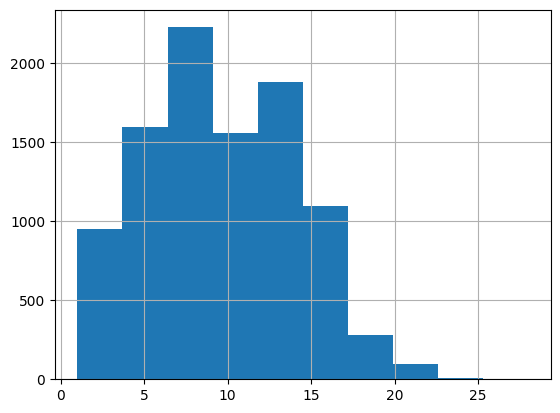

In [15]:
df2["Season"].hist()

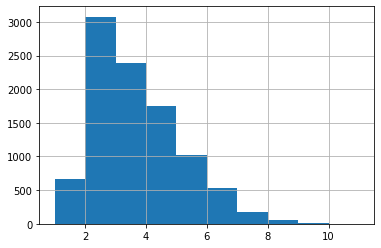

In [19]:
df2["Comp"].hist()

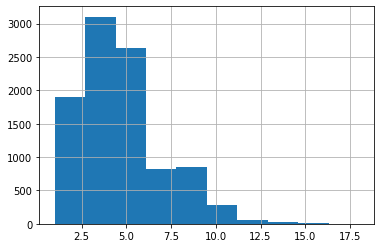

In [20]:
df2["Squad"].hist()

In [21]:
df2.describe()

,Ratio,Total_Players,Total_Seasons,Season,Comp,Squad,NewPlayers/Season,NewPlayers/Squad,NewPlayers/Comp
count,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000
mean,0.664469,115.549691,185.973402,9.647526,3.215155,4.688041,13.288117,28.332362,41.756953
std,0.151887,59.022836,102.899973,4.483164,1.469207,2.427419,5.846822,14.880551,27.590815
min,0.234756,21.000000,21.000000,1.000000,1.000000,1.000000,2.176471,4.000000,4.833333
25%,0.556818,69.000000,104.000000,6.000000,2.000000,3.000000,9.166667,18.166667,22.750000
50%,0.650663,106.000000,170.000000,10.000000,3.000000,4.000000,12.250000,25.500000,34.333333
75%,0.757143,152.000000,253.000000,13.000000,4.000000,6.000000,16.333333,35.250000,52.666667
max,1.000000,423.000000,597.000000,28.000000,11.000000,18.000000,63.000000,161.000000,334.000000


In [90]:
partition

{'00242b75': 0,
 '00242715': 0,
 '00459419': 1,
 '001a63e0': 0,
 '005c0807': 3,
 '0033fb1b': 3,
 '007b39a5': 1,
 '00891164': 3,
 '007faf7a': 3,
 '008a6e6d': 0,
 '00844823': 0,
 '00b0bb87': 4,
 '00528660': 4,
 '0118c54c': 3,
 '0127419a': 4,
 '0000acda': 4,
 '0136606c': 2,
 '014662c1': 0,
 '00454f25': 0,
 '014b57f5': 2,
 '003a5c72': 2,
 '0168069e': 3,
 '0170fb91': 3,
 '00a8d210': 3,
 '0172d6cc': 1,
 '002d06bb': 1,
 '0108f81e': 3,
 '0174ba21': 0,
 '00963611': 0,
 '017ab4d4': 2,
 '011d8c56': 2,
 '01870104': 3,
 '019f4d0d': 4,
 '014a3e8c': 3,
 '01ae64cd': 2,
 '014aa7bd': 2,
 '01b8a2b2': 4,
 '01becd60': 3,
 '01c3aff5': 0,
 '01ce9e70': 1,
 '009a4f60': 0,
 '01962d0d': 1,
 '01ceeb0f': 3,
 '012ac715': 3,
 '01e5f06e': 2,
 '01a49bd2': 2,
 '01e9c0a6': 2,
 '00b159ff': 0,
 '016828bd': 2,
 '01eb744d': 2,
 '01efac19': 4,
 '021ea92d': 1,
 '02319ad7': 2,
 '00b28772': 2,
 '023937a9': 4,
 '008925bf': 4,
 '00e3f15c': 4,
 '02503ca3': 2,
 '02728546': 4,
 '02760e49': 0,
 '01834aa0': 0,
 '02895818': 4,
 '028d36

In [23]:
uploaded5 = files.upload()

Saving LeagueEdges.csv to LeagueEdges (2).csv


In [24]:
compPlayers = pd.read_csv(io.BytesIO(uploaded5["LeagueEdges.csv"]))

115.54969072164948


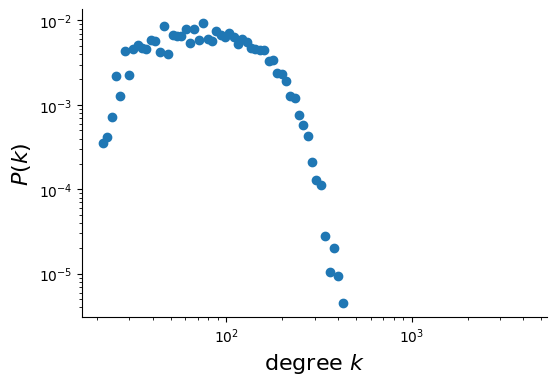

In [41]:
degrees = [G.degree(n) for n in G.nodes()]

plot_degree_dist(G,degrees)

In [124]:
dfHist2 = dfHist
dfHist2

,Unnamed: 0,Season,Squad,Comp,Country,Name,ID,LgRank,MP,Gls,CountryFixed,DOB
0,0,2010-2011,Levante,1. La Liga ESP,ESP,Sergio-Abad-Beyxer,30f729b3,14th,1,0.0,Spain,1989
1,1,2005-2006,Piacenza,2. Serie B ITA,ITA,Ignazio-Abate,1c529186,12th,13,0.0,Italy,1986
2,2,2006-2007,Modena,2. Serie B ITA,ITA,Ignazio-Abate,1c529186,16th,38,1.0,Italy,1986
3,3,2007-2008,Empoli,1. Serie A ITA,ITA,Ignazio-Abate,1c529186,18th,24,1.0,Italy,1986
4,4,2008-2009,Torino,1. Serie A ITA,ITA,Ignazio-Abate,1c529186,18th,25,1.0,Italy,1986
...,...,...,...,...,...,...,...,...,...,...,...,...
104551,104551,2019-2020,Zwolle,1. Eredivisie NED,NED,Michael-Zetterer,9b688ae1,15th,13,0.0,Germany,1995
104552,104552,2020-2021,Zwolle,1. Eredivisie NED,NED,Michael-Zetterer,9b688ae1,13th,19,0.0,Germany,1995
104553,104553,2020-2021,Werder Bremen,1. Bundesliga GER,GER,Michael-Zetterer,9b688ae1,17th,0,NaN,Germany,1995
104554,104554,2021-2022,Werder Bremen,2. 2. Bundesliga GER,GER,Michael-Zetterer,9b688ae1,2nd,11,0.0,Germany,1995


In [27]:
dfHist2['Country'] = dfHist2['Country'].str.split(' ').str[1]
dfHist2["Comp"] = dfHist2["Comp"] + [" "] + dfHist2["Country"]



In [28]:
dfHist2 = dfHist2.drop(columns=['Unnamed: 0'])

In [179]:

df = dfHist2[dfHist2["Squad"] == "Watford" ]
df = df[dfHist2["Comp"] == "1. Premier League ENG"]
df['Name'].nunique()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


101

In [29]:
dfHist2[dfHist2["Name"] == "Filipe-Luis"]

,Season,Squad,Comp,Country,Name,ID,LgRank,MP,Gls,CountryFixed,DOB
21106,2005-2006,Real Madrid B,2. Segunda División ESP,ESP,Filipe-Luis,e4ed2628,11th,37,0.0,Brazil,1985
21107,2006-2007,La Coruña,1. La Liga ESP,ESP,Filipe-Luis,e4ed2628,13th,19,0.0,Brazil,1985
21108,2007-2008,La Coruña,1. La Liga ESP,ESP,Filipe-Luis,e4ed2628,9th,33,1.0,Brazil,1985
21109,2008-2009,La Coruña,1. La Liga ESP,ESP,Filipe-Luis,e4ed2628,7th,38,2.0,Brazil,1985
21110,2009-2010,La Coruña,1. La Liga ESP,ESP,Filipe-Luis,e4ed2628,10th,21,3.0,Brazil,1985
21111,2010-2011,Atlético Madrid,1. La Liga ESP,ESP,Filipe-Luis,e4ed2628,7th,27,1.0,Brazil,1985
21112,2011-2012,Atlético Madrid,1. La Liga ESP,ESP,Filipe-Luis,e4ed2628,5th,36,0.0,Brazil,1985
21113,2012-2013,Atlético Madrid,1. La Liga ESP,ESP,Filipe-Luis,e4ed2628,3rd,32,1.0,Brazil,1985
21114,2013-2014,Atlético Madrid,1. La Liga ESP,ESP,Filipe-Luis,e4ed2628,1st,32,0.0,Brazil,1985
21115,2014-2015,Chelsea,1. Premier League ENG,ENG,Filipe-Luis,e4ed2628,1st,15,0.0,Brazil,1985


In [186]:
testingSquad = dfHist2[["Comp", "Squad", "CountryFixed","Name", "ID"]]
testingSquad = testingSquad.groupby(['Comp', 'Squad']).agg({ "ID" : 'nunique', 'Name' : lambda x: x.tolist(), 'CountryFixed' : 'count'}).reset_index()
# testingSquad[testingSquad["Comp"] == "1. Premier League RUS"]
# testingSquad = testingSquad.sort_values('Name', ascending=False)
testingSquad.reset_index()
# testingSquad[testingSquad["Comp"] == "1. Ligue 1 FRA"][0:20]
# testingSquad = testingSquad[testingSquad['Name'] > 100]
testingSquad.sort_values('Name', ascending=False)

# testingSquad = testingSquad[testingSquad['Squad'] == "Watford"]
# len(testingSquad['Name'])
testingSquad
testingSquad.rename(columns = {'Comp' : 'Source', 'Squad' : 'Target'})
testingSquad.to_csv('raw_data.csv', index=False)
files.download('raw_data.csv')
#Competition Squad pairs (which club has the most unique pairs with the comp)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [187]:
testingSquad

,Comp,Squad,ID,Name,CountryFixed
0,1. 1. HNL CRO,Cibalia,4,"[Petar-Filipovic, Francisco-Sutil, Dario-Zupar...",6
1,1. 1. HNL CRO,Dinamo Zagreb,56,"[Eduardo-Carvalho, Eduardo-Carvalho, Eduardo-C...",186
2,1. 1. HNL CRO,Dragovoljac,1,[Marcelo-Brozovic],1
3,1. 1. HNL CRO,Gorica,6,"[Jiloan-Hamad, Jiloan-Hamad, Cheick-Keita, Che...",9
4,1. 1. HNL CRO,Hajduk Split,36,"[Hugo-Almeida, Nikola-Kalinic, Nikola-Kalinic,...",110
...,...,...,...,...,...
2415,Jr. U19 Bundesliga GER,Stuttgart U19,9,"[Berkay-Ozcan, Antonis-Aidonis, Antonis-Aidoni...",15
2416,Jr. U19 Bundesliga GER,TSV 1860 München U19,3,"[Kilian-Jakob, Christoph-Daferner, Lino-Tempel...",3
2417,Jr. U19 Bundesliga GER,U'haching U19,1,[Karim-Adeyemi],1
2418,Jr. U19 Bundesliga GER,Union U19,3,"[Tim-Maciejewski, Tim-Maciejewski, Fisnik-Asll...",4


In [ ]:
testing = dfHist[["Comp", "Country", "CountryFixed","Name"]]
testing = testing.groupby('Comp').agg({"Country" : 'count',
                                        "Name" : 'nunique'
                                        }).reset_index()
testing = testing.sort_values('Name', ascending=False)
testing = testing.rename(columns = {'Country' : "Count_Player_Seasons", 'Name' : 'UniquePlayers'})
testing.reset_index()
#percentage of players passing through this league
testing['proportionPlayers'] = testing['UniquePlayers'] / nodes['Name'].count() * 100
testing[10:]

In [399]:
testing[:15]

NameError: name 'testing' is not defined

In [31]:
testing2 = dfHist[["Comp", "Country", "CountryFixed","Name"]]
testing2 = testing2.groupby(['Comp', 'CountryFixed', 'Country']).agg({ "Name" : 'count'}).reset_index()
testing2[testing2["Comp"] == "1. Premier League RUS"]
testing2 = testing2.sort_values('Name', ascending=False)
testing2.reset_index()
testing2[testing2["Comp"] == "1. Ligue 1 FRA"][0:20]


,Comp,CountryFixed,Country,Name
910,1. Ligue 1 FRA,France,FRA,4811
961,1. Ligue 1 FRA,Senegal,FRA,442
886,1. Ligue 1 FRA,Brazil,FRA,428
938,1. Ligue 1 FRA,Mali,FRA,324
928,1. Ligue 1 FRA,Ivory Coast,FRA,283
890,1. Ligue 1 FRA,Cameroon,FRA,230
876,1. Ligue 1 FRA,Algeria,FRA,225
944,1. Ligue 1 FRA,Morocco,FRA,197
878,1. Ligue 1 FRA,Argentina,FRA,166
955,1. Ligue 1 FRA,Portugal,FRA,151


In [32]:
testing2[testing2["Comp"][-3:] != testing2["Country"]]

ValueError: ignored

In [33]:
nation1 = []
nation2 = []
for index, row in edgesDf.iterrows():
  nation1.append(row["Nation1"])
  nation2.append(row["Nation2"])



In [ ]:
countryPairs.describe()

,Nation1,Nation2,Name1,Name2
count,560416,560416,560416,560416
unique,148,147,9484,9473
top,Spain,Spain,Juanfran,Michel
freq,74510,76914,412,452


In [34]:
pd.DataFrame(nation1, columns=['q_data'])

countryPairs = pd.DataFrame(nation1, columns = ['Nation1'])
countryPairs["Nation2"] = nation2
countryPairs["Name1"] = edgesDf["Name1"]
countryPairs["Name2"] = edgesDf["Name2"]

countryEdges = countryPairs.groupby(["Nation1", "Nation2"]).agg({
                                                'Name1' : 'count'
                                                }).reset_index()
countryEdges = countryEdges.sort_values('Name1', ascending=False)
countryEdges = countryEdges.reset_index()

countryEdges2 = countryPairs.groupby(["Nation2", "Nation1"]).agg({
                                                'Name1' : 'count'
                                                }).reset_index()
countryEdges2 = countryEdges2.sort_values('Name1', ascending=False)
countryEdges2 = countryEdges2.reset_index()
                                            


In [35]:
countryPairs['nationcomb'] = countryPairs.apply(lambda x: list([x['Nation1'], x['Nation2']]), axis=1)
countryPairs

,Nation1,Nation2,Name1,Name2,nationcomb
0,Luxembourg,France,Leandro-Barreiro-Martins,Moussa-Niakhate,"[Luxembourg, France]"
1,Austria,Germany,Marko-Arnautovic,Ozkan-Yildirim,"[Austria, Germany]"
2,Algeria,Sweden,Zinedine-Ferhat,Niclas-Eliasson,"[Algeria, Sweden]"
3,Cuba,Germany,Onel-Hernandez,Ozkan-Yildirim,"[Cuba, Germany]"
4,Benin,France,Cedric-Hountondji,Lucas-Da-Cunha,"[Benin, France]"
...,...,...,...,...,...
560411,Belgium,Ireland,Jeremy-Doku,Josh-Cullen,"[Belgium, Ireland]"
560412,Belgium,Serbia,Jeremy-Doku,Ivan-Obradovic,"[Belgium, Serbia]"
560413,Belgium,Democratic Republic of the Congo,Jeremy-Doku,Edo-Kayembe,"[Belgium, Democratic Republic of the Congo]"
560414,Belgium,Croatia,Jeremy-Doku,Lovro-Majer,"[Belgium, Croatia]"


In [36]:
countryPairs['nationcomb'] = countryPairs['nationcomb'].apply(lambda x: sorted(list(x)))
countryPairs

,Nation1,Nation2,Name1,Name2,nationcomb
0,Luxembourg,France,Leandro-Barreiro-Martins,Moussa-Niakhate,"[France, Luxembourg]"
1,Austria,Germany,Marko-Arnautovic,Ozkan-Yildirim,"[Austria, Germany]"
2,Algeria,Sweden,Zinedine-Ferhat,Niclas-Eliasson,"[Algeria, Sweden]"
3,Cuba,Germany,Onel-Hernandez,Ozkan-Yildirim,"[Cuba, Germany]"
4,Benin,France,Cedric-Hountondji,Lucas-Da-Cunha,"[Benin, France]"
...,...,...,...,...,...
560411,Belgium,Ireland,Jeremy-Doku,Josh-Cullen,"[Belgium, Ireland]"
560412,Belgium,Serbia,Jeremy-Doku,Ivan-Obradovic,"[Belgium, Serbia]"
560413,Belgium,Democratic Republic of the Congo,Jeremy-Doku,Edo-Kayembe,"[Belgium, Democratic Republic of the Congo]"
560414,Belgium,Croatia,Jeremy-Doku,Lovro-Majer,"[Belgium, Croatia]"


In [37]:
countryEdges = countryPairs.groupby(countryPairs['nationcomb'].map(tuple)).agg({
                                                'Name1' : 'count',

                                                }).reset_index()
countryEdges

countryEdges = countryEdges.sort_values('Name1', ascending=False)
countryEdges= countryEdges.reset_index()

nations = []

for index, row in countryEdges.iterrows():
  nations.append(row["nationcomb"])

nations

[('Spain', 'Spain'),
 ('Italy', 'Italy'),
 ('France', 'France'),
 ('Germany', 'Germany'),
 ('England', 'England'),
 ('Argentina', 'Spain'),
 ('Brazil', 'Italy'),
 ('Argentina', 'Italy'),
 ('Brazil', 'Spain'),
 ('France', 'Senegal'),
 ('France', 'Spain'),
 ('England', 'Ireland'),
 ('Brazil', 'France'),
 ('France', 'Italy'),
 ('England', 'France'),
 ('Portugal', 'Spain'),
 ('Italy', 'Spain'),
 ('England', 'Scotland'),
 ('France', 'Mali'),
 ('England', 'Spain'),
 ('France', 'Ivory Coast'),
 ('Spain', 'Uruguay'),
 ('Italy', 'Uruguay'),
 ('England', 'Wales'),
 ('Austria', 'Germany'),
 ('Brazil', 'Brazil'),
 ('Algeria', 'France'),
 ('Cameroon', 'France'),
 ('Argentina', 'Argentina'),
 ('France', 'Germany'),
 ('France', 'Morocco'),
 ('Argentina', 'France'),
 ('Italy', 'Serbia'),
 ('Brazil', 'Germany'),
 ('Croatia', 'Italy'),
 ('France', 'Portugal'),
 ('England', 'Netherlands'),
 ('Germany', 'Netherlands'),
 ('Germany', 'Switzerland'),
 ('Argentina', 'Brazil'),
 ('Serbia', 'Spain'),
 ('Belgium

In [38]:
xxx = pd.DataFrame(countryEdges['nationcomb'].tolist(), columns=['Nation1', 'Nation2'])
xxx

,Nation1,Nation2
0,Spain,Spain
1,Italy,Italy
2,France,France
3,Germany,Germany
4,England,England
...,...,...
6360,Bosnia and Herzegovina,Trinidad and Tobago
6361,Armenia,Luxembourg
6362,Armenia,Madagascar
6363,Denmark,Gibraltar


In [39]:
finalCountries = pd.concat([xxx,countryEdges], axis=1)

In [40]:
finalCountries.drop('nationcomb', axis=1, inplace=True)

In [41]:
finalCountries.rename(columns={'Name1' : 'count'}, inplace= True)
finalCountries[finalCountries['count'] > 1000]

,Nation1,Nation2,index,count
0,Spain,Spain,6236,43387
1,Italy,Italy,4665,35817
2,France,France,3443,23741
3,Germany,Germany,3766,17397
4,England,England,3170,15893
...,...,...,...,...
91,Germany,Japan,3786,1035
92,Croatia,Spain,2559,1033
93,France,Ghana,3449,1013
94,Argentina,Uruguay,500,1006


In [42]:
print(finalCountries['count'].sum(), finalCountries[5:]['count'].sum())
nonLeagueCountries = finalCountries[5:]

560416 424181


In [43]:
nonLeagueCountries['proportion'] = nonLeagueCountries['count'] / nonLeagueCountries['count'].sum() * 100
nonLeagueCountries

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nation1,Nation2,index,count,proportion
5,Argentina,Spain,486,7372,1.737937
6,Brazil,Italy,1391,6332,1.492759
7,Argentina,Italy,432,5874,1.384786
8,Brazil,Spain,1449,4860,1.145737
9,France,Senegal,3515,4628,1.091044
...,...,...,...,...,...
6360,Bosnia and Herzegovina,Trinidad and Tobago,1331,1,0.000236
6361,Armenia,Luxembourg,547,1,0.000236
6362,Armenia,Madagascar,548,1,0.000236
6363,Denmark,Gibraltar,2914,1,0.000236


In [50]:
edgesDf

,source,target,Season,Name1,Name2,Squad,League,LeagueRank,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Weight
0,00242b75,00242715,"['2018-2019', '2019-2020', '2020-2021', '2021-...",Leandro-Barreiro-Martins,Moussa-Niakhate,"['Mainz 05', 'Mainz 05', 'Mainz 05', 'Mainz 05']","['1. Bundesliga', '1. Bundesliga', '1. Bundesl...","['12th', '13th', '12th', '8th']",Luxembourg,France,2000,1996,79,128,3.0,9.0,4
1,00459419,001a63e0,"['2012-2013', '2013-2014']",Marko-Arnautovic,Ozkan-Yildirim,"['Werder Bremen', 'Werder Bremen']","['1. Bundesliga', '1. Bundesliga']","['14th', '12th']",Austria,Germany,1989,1993,28,18,5.0,0.0,2
2,005c0807,0033fb1b,"['2020-2021', '2021-2022']",Zinedine-Ferhat,Niclas-Eliasson,"['Nîmes', 'Nîmes']","['1. Ligue 1', '2. Ligue 2']","['19th', '9th']",Algeria,Sweden,1993,1995,47,66,6.0,11.0,2
3,007b39a5,001a63e0,['2017-2018'],Onel-Hernandez,Ozkan-Yildirim,['Braunschweig'],['2. 2. Bundesliga'],['17th'],Cuba,Germany,1993,1993,17,17,1.0,1.0,1
4,00891164,007faf7a,['2021-2022'],Cedric-Hountondji,Lucas-Da-Cunha,['Clermont Foot'],['1. Ligue 1'],['17th'],Benin,France,1994,2001,23,15,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560411,fffea3e5,f6d7d690,['2020-2021'],Jeremy-Doku,Josh-Cullen,['Anderlecht'],['1. First Division A'],['4th'],Belgium,Ireland,2002,1996,7,21,2.0,0.0,1
560412,fffea3e5,f6ddac8f,['2018-2019'],Jeremy-Doku,Ivan-Obradovic,['Anderlecht'],['1. First Division A'],['6th'],Belgium,Serbia,2002,1988,6,10,0.0,0.0,1
560413,fffea3e5,f99b71de,"['2018-2019', '2019-2020', '2020-2021']",Jeremy-Doku,Edo-Kayembe,"['Anderlecht', 'Anderlecht', 'Anderlecht']","['1. First Division A', '1. First Division A',...","['6th', '8th', '4th']",Belgium,Democratic Republic of the Congo,2002,1998,34,32,5.0,0.0,3
560414,fffea3e5,fc46aab1,"['2021-2022', '2022-2023']",Jeremy-Doku,Lovro-Majer,"['Rennes', 'Rennes']","['1. Ligue 1', '1. Ligue 1']","['4th', '6th']",Belgium,Croatia,2002,1998,20,37,1.0,6.0,2


In [118]:
edgesDfTest = edgesDf

,source,target,Season,Name1,Name2,Squad,League,LeagueRank,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Weight


In [119]:
for index, row in edgesDfTest.iterrows():
  found = False
  leagueList = row['League'].split(',')
  #print(leagueList)
  row["League"] = leagueList
  for i in row['League']:
    i = i.replace("[", "")
    i = i.replace("]", "")
    #print(i)
    if(i == "'1. Bundesliga'" or i == "'1. Ligue 1'" or i == "'1. Serie A'" or  i == "'1. Premier League'" or i == "'1. La Liga'"):
      #print(i)
      found = True
  if found == True:
    edgesDfTest.at[index,'Flag'] = 1
  else:
    edgesDfTest.at[index, 'Flag'] = 0
    

edgesDfTest[edgesDfTest['Flag'] == 0]



,source,target,Season,Name1,Name2,Squad,League,LeagueRank,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Weight,Flag
3,007b39a5,001a63e0,['2017-2018'],Onel-Hernandez,Ozkan-Yildirim,['Braunschweig'],['2. 2. Bundesliga'],['17th'],Cuba,Germany,1993,1993,17,17,1.0,1.0,1,0.0
5,008a6e6d,00844823,"['2008-2009', '2009-2010', '2010-2011', '2011-...",Ragnar-Klavan,Niklas-Moisander,"['AZ Alkmaar', 'AZ Alkmaar', 'AZ Alkmaar', 'AZ...","['1. Eredivisie', '1. Eredivisie', '1. Eredivi...","['1st', '5th', '4th', '4th']",Estonia,Finland,1985,1985,77,109,0.0,3.0,4,0.0
11,014662c1,00454f25,['2020-2021'],Lukas-Raeder,Soufian-Benyamina,['Lübeck'],['3. 3. Liga'],['19th'],Germany,Germany,1993,1990,37,24,0.0,3.0,1,0.0
12,014b57f5,003a5c72,['2021-2022'],Sergio-Moreno,Mikel-San-Jose,['SD Amorebieta'],['2. Segunda División'],['19th'],Spain,Spain,1999,1989,16,27,0.0,1.0,1,0.0
13,0168069e,00242715,['2014-2015'],Adama-Coulibaly,Moussa-Niakhate,['Valenciennes'],['2. Ligue 2'],['16th'],Mali,France,1980,1996,26,9,1.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560408,fffea3e5,ee251371,"['2018-2019', '2019-2020']",Jeremy-Doku,Alexis-Saelemaekers,"['Anderlecht', 'Anderlecht']","['1. First Division A', '1. First Division A']","['6th', '8th']",Belgium,Belgium,2002,1999,27,46,3.0,2.0,2,0.0
560411,fffea3e5,f6d7d690,['2020-2021'],Jeremy-Doku,Josh-Cullen,['Anderlecht'],['1. First Division A'],['4th'],Belgium,Ireland,2002,1996,7,21,2.0,0.0,1,0.0
560412,fffea3e5,f6ddac8f,['2018-2019'],Jeremy-Doku,Ivan-Obradovic,['Anderlecht'],['1. First Division A'],['6th'],Belgium,Serbia,2002,1988,6,10,0.0,0.0,1,0.0
560413,fffea3e5,f99b71de,"['2018-2019', '2019-2020', '2020-2021']",Jeremy-Doku,Edo-Kayembe,"['Anderlecht', 'Anderlecht', 'Anderlecht']","['1. First Division A', '1. First Division A',...","['6th', '8th', '4th']",Belgium,Democratic Republic of the Congo,2002,1998,34,32,5.0,0.0,3,0.0


In [123]:
edgesNonTopLeagues =  edgesDfTest[edgesDfTest['Flag'] == 0]
edgesInTopLeagues = edgesDfTest[edgesDfTest['Flag'] == 1]
edgesNonTopLeagues

,source,target,Season,Name1,Name2,Squad,League,LeagueRank,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Weight,Flag
3,007b39a5,001a63e0,['2017-2018'],Onel-Hernandez,Ozkan-Yildirim,['Braunschweig'],['2. 2. Bundesliga'],['17th'],Cuba,Germany,1993,1993,17,17,1.0,1.0,1,0.0
5,008a6e6d,00844823,"['2008-2009', '2009-2010', '2010-2011', '2011-...",Ragnar-Klavan,Niklas-Moisander,"['AZ Alkmaar', 'AZ Alkmaar', 'AZ Alkmaar', 'AZ...","['1. Eredivisie', '1. Eredivisie', '1. Eredivi...","['1st', '5th', '4th', '4th']",Estonia,Finland,1985,1985,77,109,0.0,3.0,4,0.0
11,014662c1,00454f25,['2020-2021'],Lukas-Raeder,Soufian-Benyamina,['Lübeck'],['3. 3. Liga'],['19th'],Germany,Germany,1993,1990,37,24,0.0,3.0,1,0.0
12,014b57f5,003a5c72,['2021-2022'],Sergio-Moreno,Mikel-San-Jose,['SD Amorebieta'],['2. Segunda División'],['19th'],Spain,Spain,1999,1989,16,27,0.0,1.0,1,0.0
13,0168069e,00242715,['2014-2015'],Adama-Coulibaly,Moussa-Niakhate,['Valenciennes'],['2. Ligue 2'],['16th'],Mali,France,1980,1996,26,9,1.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560408,fffea3e5,ee251371,"['2018-2019', '2019-2020']",Jeremy-Doku,Alexis-Saelemaekers,"['Anderlecht', 'Anderlecht']","['1. First Division A', '1. First Division A']","['6th', '8th']",Belgium,Belgium,2002,1999,27,46,3.0,2.0,2,0.0
560411,fffea3e5,f6d7d690,['2020-2021'],Jeremy-Doku,Josh-Cullen,['Anderlecht'],['1. First Division A'],['4th'],Belgium,Ireland,2002,1996,7,21,2.0,0.0,1,0.0
560412,fffea3e5,f6ddac8f,['2018-2019'],Jeremy-Doku,Ivan-Obradovic,['Anderlecht'],['1. First Division A'],['6th'],Belgium,Serbia,2002,1988,6,10,0.0,0.0,1,0.0
560413,fffea3e5,f99b71de,"['2018-2019', '2019-2020', '2020-2021']",Jeremy-Doku,Edo-Kayembe,"['Anderlecht', 'Anderlecht', 'Anderlecht']","['1. First Division A', '1. First Division A',...","['6th', '8th', '4th']",Belgium,Democratic Republic of the Congo,2002,1998,34,32,5.0,0.0,3,0.0


Motifs

In [ ]:
# Install dotmotif with one line.
# On your own computer, you can run this in the terminal.
!pip3 install dotmotif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dotmotif import Motif, GrandIsoExecutor
from dotmotif.ingest import CSVEdgelistConverter

In [ ]:
edgesDf2 = edgesDf
edgesDf2.rename(columns = {'source' : 'pre_root_id', 'target' : 'post_root_id'}, inplace=True)
edgesDf2

,pre_root_id,post_root_id,Season,Name1,Name2,Squad,League,LeagueRank,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Weight
0,00242b75,00242715,"['2018-2019', '2019-2020', '2020-2021', '2021-...",Leandro-Barreiro-Martins,Moussa-Niakhate,"['Mainz 05', 'Mainz 05', 'Mainz 05', 'Mainz 05']","['1. Bundesliga', '1. Bundesliga', '1. Bundesl...","['12th', '13th', '12th', '8th']",Luxembourg,France,2000,1996,79,128,3.0,9.0,4
1,00459419,001a63e0,"['2012-2013', '2013-2014']",Marko-Arnautovic,Ozkan-Yildirim,"['Werder Bremen', 'Werder Bremen']","['1. Bundesliga', '1. Bundesliga']","['14th', '12th']",Austria,Germany,1989,1993,28,18,5.0,0.0,2
2,005c0807,0033fb1b,"['2020-2021', '2021-2022']",Zinedine-Ferhat,Niclas-Eliasson,"['Nîmes', 'Nîmes']","['1. Ligue 1', '2. Ligue 2']","['19th', '9th']",Algeria,Sweden,1993,1995,47,66,6.0,11.0,2
3,007b39a5,001a63e0,['2017-2018'],Onel-Hernandez,Ozkan-Yildirim,['Braunschweig'],['2. 2. Bundesliga'],['17th'],Cuba,Germany,1993,1993,17,17,1.0,1.0,1
4,00891164,007faf7a,['2021-2022'],Cedric-Hountondji,Lucas-Da-Cunha,['Clermont Foot'],['1. Ligue 1'],['17th'],Benin,France,1994,2001,23,15,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560411,fffea3e5,f6d7d690,['2020-2021'],Jeremy-Doku,Josh-Cullen,['Anderlecht'],['1. First Division A'],['4th'],Belgium,Ireland,2002,1996,7,21,2.0,0.0,1
560412,fffea3e5,f6ddac8f,['2018-2019'],Jeremy-Doku,Ivan-Obradovic,['Anderlecht'],['1. First Division A'],['6th'],Belgium,Serbia,2002,1988,6,10,0.0,0.0,1
560413,fffea3e5,f99b71de,"['2018-2019', '2019-2020', '2020-2021']",Jeremy-Doku,Edo-Kayembe,"['Anderlecht', 'Anderlecht', 'Anderlecht']","['1. First Division A', '1. First Division A',...","['6th', '8th', '4th']",Belgium,Democratic Republic of the Congo,2002,1998,34,32,5.0,0.0,3
560414,fffea3e5,fc46aab1,"['2021-2022', '2022-2023']",Jeremy-Doku,Lovro-Majer,"['Rennes', 'Rennes']","['1. Ligue 1', '1. Ligue 1']","['4th', '6th']",Belgium,Croatia,2002,1998,20,37,1.0,6.0,2


In [ ]:
graph = CSVEdgelistConverter(
    edgesDf,
    # Tell DotMotif which columns represent the "source" and "target"
    # of the edgelist:
    "pre_root_id",
    "post_root_id",
).to_graph()

In [2]:
list(H.edges())

NameError: ignored

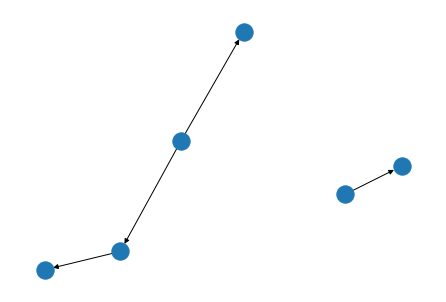

In [244]:
H = graph.subgraph(['fc46aab1', 'fffea3e5', 'fc46aab1', '005c0807', '0033fb1b', '00459419', 'f6d7d690'])
nx.draw(H)

In [254]:
# Create the search engine.
E = GrandIsoExecutor(graph=graph)

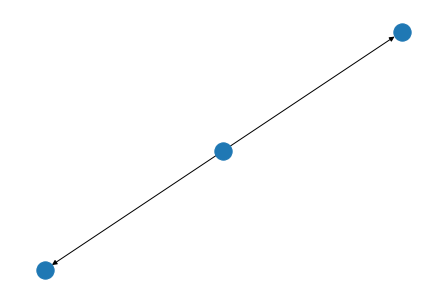

In [255]:
motif = Motif("""
A -> B
A -> C
""")

G = motif.to_nx()
nx.draw(G)

In [1]:
results = E.count(motif)

NameError: ignored

In [250]:
results

[{'A': 'fffea3e5', 'B': 'f6d7d690', 'C': 'fc46aab1'},
 {'A': 'fffea3e5', 'B': 'fc46aab1', 'C': 'f6d7d690'}]

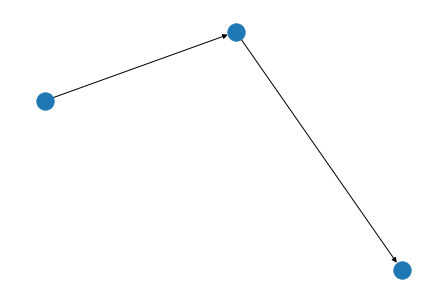

In [ ]:
# Build your own motif here!
motif = Motif("""

# Example motif:

onewayEdge(a, b) {
    # An edge that only points in one direction,
    # with no reciprocal edge: 
    a -> b
}

# A triangle that only has edges pointing
# in one direction:
onewayEdge(A, B)
onewayEdge(B, C)
# onewayEdge(C, A)

""")

G = motif.to_nx()
nx.draw(G)

In [ ]:
results = E.find(motif)

KeyboardInterrupt: ignored

In [ ]:
print(len(results))

TypeError: ignored